In [1]:
#import packages
import numpy as np
import copy
import pandas
import os
import imp
import pickle
from scipy.interpolate import interp1d
import warnings
import time
import matplotlib.pyplot as plt
import inspect
import types
import math as mat
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
import datetime
from matplotlib import animation
from IPython.display import HTML
from tempfile import NamedTemporaryFile
import matplotlib.backends.backend_pdf
from scipy import interpolate
from itertools import groupby
import re
import csv
import copy

sns.set()
sns.set_style()
%matplotlib inline

In [1]:
import matplotlib
matplotlib.__version__


'1.5.3'

In [2]:
#functions

def getfilenames_strain(path, strain):
#returns pandas dataframe of list of files from the wanted strain
#path: path to csv file with all filenames and strains listed
#strain: string of strain name   
    path = os.path.abspath(path)
    csvread_meta = pandas.read_csv(path,engine='python') 
    dataFileNames = csvread_meta.Filename[csvread_meta['Strain'].str.strip()==strain]
    return dataFileNames

def getfilenames_exp(path, exp):
#returns pandas dataframe of list of files from the wanted strain
#path: path to csv file with all filenames and strains listed
#strain: string of strain name   
    path = os.path.abspath(path)
    csvread_meta = pandas.read_csv(path,engine='python') 
    dataFileNames = csvread_meta.Filename[csvread_meta['Experiment'].str.strip()==exp]
    return dataFileNames

#function to read stimulus order 
def getstimulus_order(path):
#returns pandas dataframe of list of files from the wanted strain
#path: path to csv file with all filenames and strains listed
#strain: string of strain name   
    path = os.path.abspath(path)
    csvread_meta = pandas.read_csv(path,engine='python') 
    return csvread_meta

def get_frame_for_pattern_number(path, pattern_number):
    pn = str(pattern_number)
    path = os.path.abspath(path)
    csvread_meta = pandas.read_csv(path,engine='python') 
    pattern_number = csvread_meta.frames[csvread_meta['Pats'].str.strip()==pn]
    return pattern_number


#function to read pattern key
def get_pattern_key(path, exp):
    path = os.path.abspath(path)
    csvread_meta = pandas.read_csv(path,engine='python') 
    Pattern_Key = csvread_meta.Pattern_Key[csvread_meta['Experiment'].str.strip()==exp]
    return Pattern_Key


def makefilepaths (path, filenames):
#path: path of folder where data is saved
#filenames: pandas dataframe listing all filenames
    fullpaths = []
    for i in range(len(filenames)):
        fullpath = path+filenames.iloc[i]
        fullpaths.append(fullpath)
    return fullpaths

def get_filepaths(dataDir):
#gets the paths of csv files in the directory baseDir
    allpaths = []
    for root, dirs, files in os.walk(dataDir):
        for file in files:
            if file.endswith(".csv"):
                angle_file = (os.path.join(root, file))
                allpaths.append(angle_file)
    return allpaths
            
def get_frames_angles(allpaths):
#gets the frames and angles of the files
#allpaths is a list of paths to the files from the magno tracker
    all_frames = []
    all_angles = []
    for i in range(len(allpaths)):
        csv_path = allpaths[i]
        f = open(csv_path)
        csv_f = csv.reader(f)
        frames = []
        angles = []
        for row in csv_f:
            nrow = row[0]
            frame = int(nrow.split(" ", 1)[0].rsplit(" ", 1)[0])
            angle = float(nrow.split(" ", 1)[1].rsplit(" ", 1)[0])
            frames.append(frame)
            angles.append(angle)
        all_frames.append(frames)
        all_angles.append(angles)
    return all_frames, all_angles

In [3]:
#new functions
def get_frames_angles(allpaths):
#gets the frames and angles of the files
#allpaths is a list of paths to the files from the magno tracker
    all_frames = []
    all_angles = []
    all_times = []
    for i in range(len(allpaths)):
        csv_path = allpaths[i]
        f = open(csv_path)
        csv_f = csv.reader(f)
        frames = []
        angles = []
        times = []
        for row in csv_f:
            nrow = row[0]
            frame = int(nrow.split(" ", 1)[0].rsplit(" ", 1)[0])
            time = str(nrow.split(" ", 1)[1].rsplit(" ", 1)[0])
            angle = float(nrow.split(" ", 2)[2].rsplit(" ", 1)[0])            
            frames.append(frame)
            angles.append(angle)
            times.append(time)
        all_frames.append(frames)
        all_angles.append(angles)
        all_times.append(times)
    return all_frames, all_times, all_angles

def get_times_secs(alltimes):
    allsecs = []
    for i in range(len(alltimes)):
        secs = []
        for j in range(len(alltimes[i])):
            tt = alltimes[i][j]
            ttt = str(tt.split("-", 1)[0].rsplit(" ", 1)[0])
            ttf = (ttt[0:2]+':'+ttt[2:4]+':'+ttt[4:6]+':'+ttt[7::])
            secsms = int(ttt[4:6])+(int(ttt[7::])/1000000)
            hs = int(ttt[0:2])*3600
            mins = int(ttt[2:4])*60
            sss = hs+mins+secsms
            secs.append(sss)
        allsecs.append(secs) 
    return allsecs

In [4]:
dataDir = '/Users/fponce/Documents/vdesert/temp'
# datapaths = makefilepaths(dataDir, dataFileNames)
#allframes, allangles = get_frames_angles(datapaths)

datapaths = []
for dir , subdir, files in os.walk(dataDir ):
    for file in files:
        if file.endswith(".csv"):
            a = (os.path.join(dir , file))
            datapaths.append(a)

In [5]:
print(datapaths)

['/Users/fponce/Documents/vdesert/temp/angle_data_magnotether_20190411_143643.csv', '/Users/fponce/Documents/vdesert/temp/angle_data_magnotether_20190411_144658.csv', '/Users/fponce/Documents/vdesert/temp/angle_data_magnotether_20190411_144756.csv', '/Users/fponce/Documents/vdesert/temp/angle_data_magnotether_20190411_144937.csv', '/Users/fponce/Documents/vdesert/temp/angle_data_magnotether_20190411_151418.csv', '/Users/fponce/Documents/vdesert/temp/angle_data_magnotether_20190411_152547.csv', '/Users/fponce/Documents/vdesert/temp/angle_data_magnotether_20190411_154628.csv', '/Users/fponce/Documents/vdesert/temp/angle_data_magnotether_20190411_161159.csv', '/Users/fponce/Documents/vdesert/temp/angle_data_magnotether_20190411_162107.csv', '/Users/fponce/Documents/vdesert/temp/angle_data_magnotether_20190411_164923.csv', '/Users/fponce/Documents/vdesert/temp/angle_data_magnotether_20190412_153319.csv', '/Users/fponce/Documents/vdesert/temp/angle_data_magnotether_20190412_153531.csv', '/U

In [6]:
allframes, alltimes, allangles= get_frames_angles(datapaths)
allsecs = get_times_secs(alltimes)

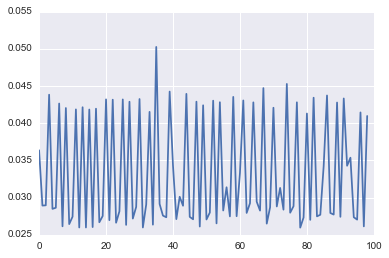

In [10]:
plt.plot(np.diff(allsecs[0][0:100]))

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


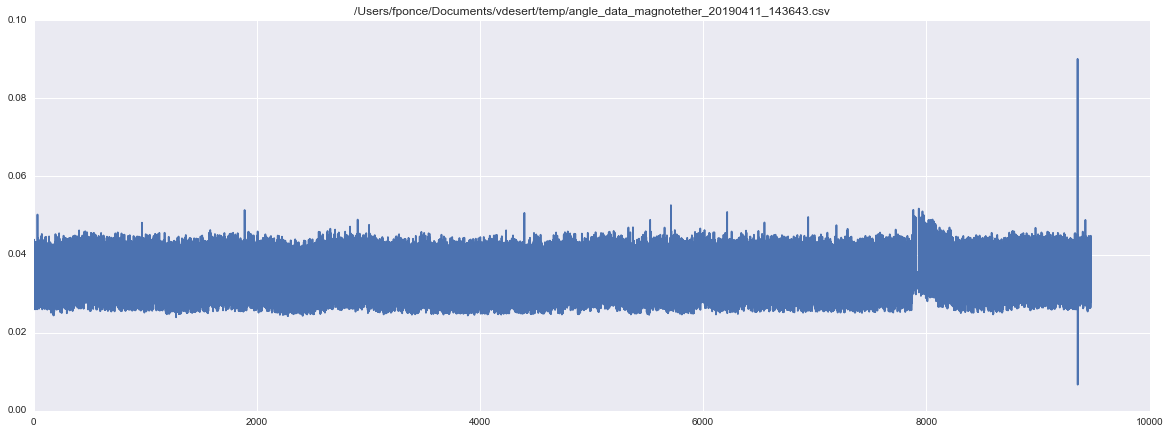

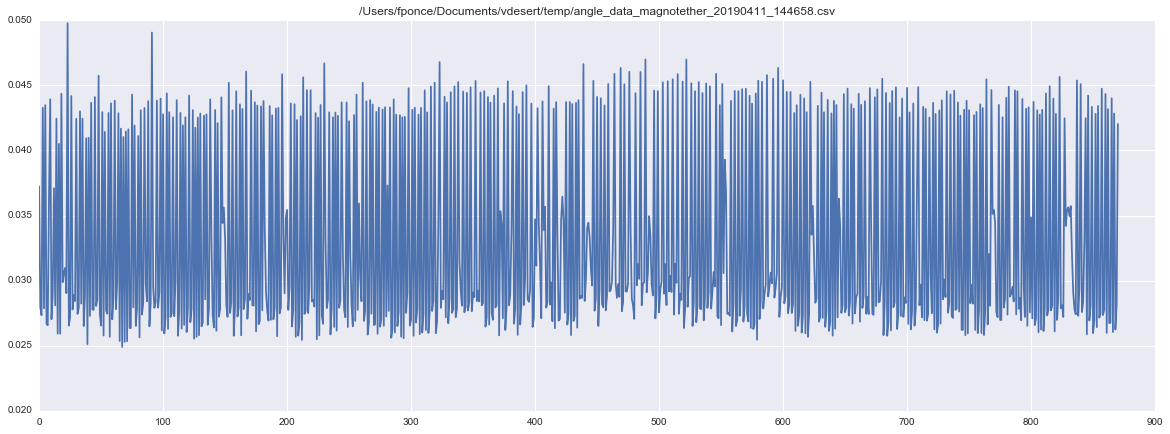

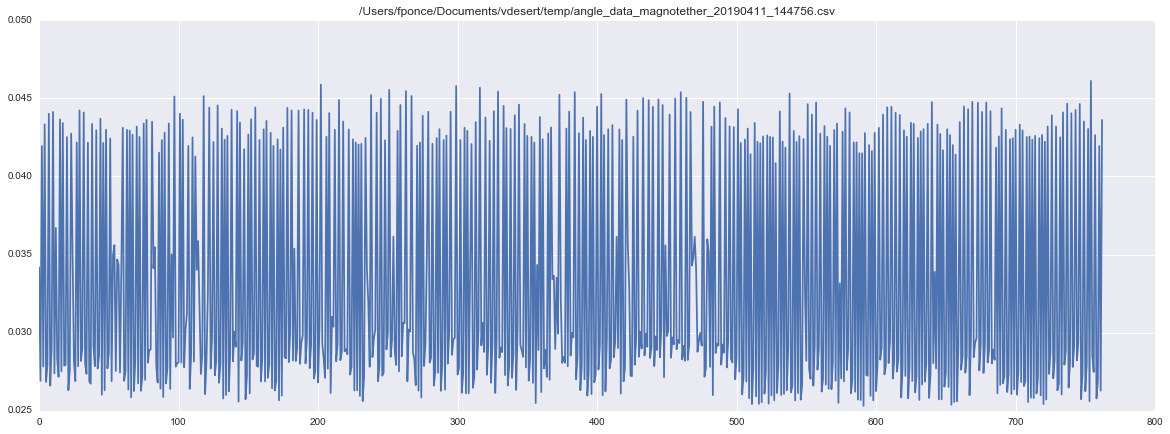

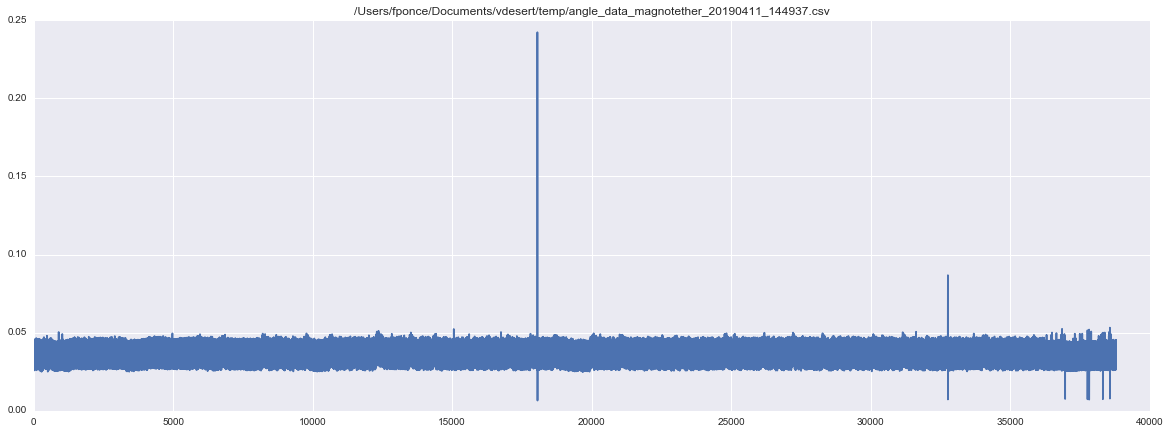

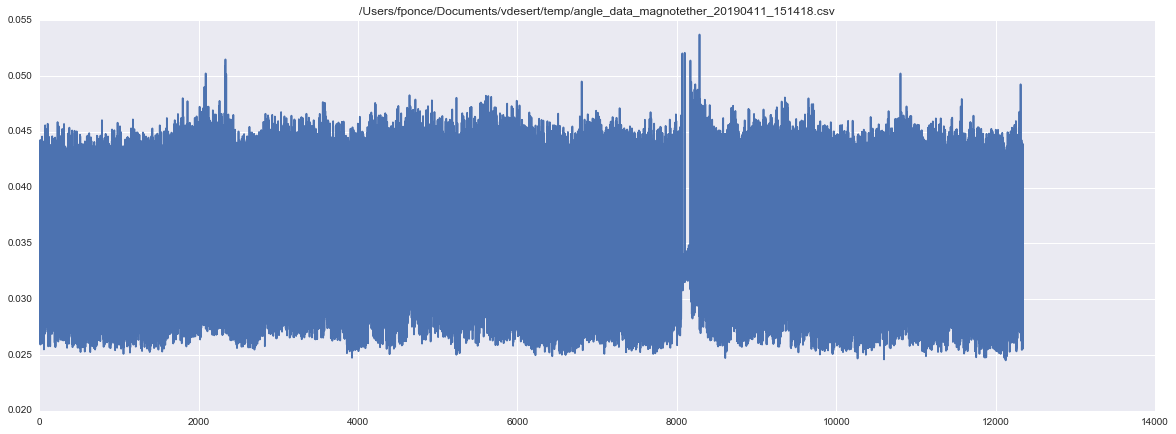

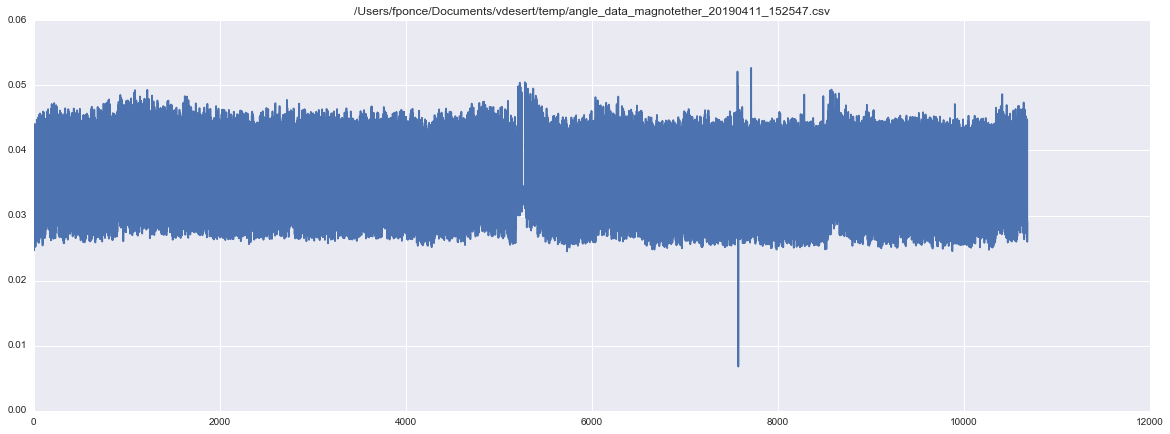

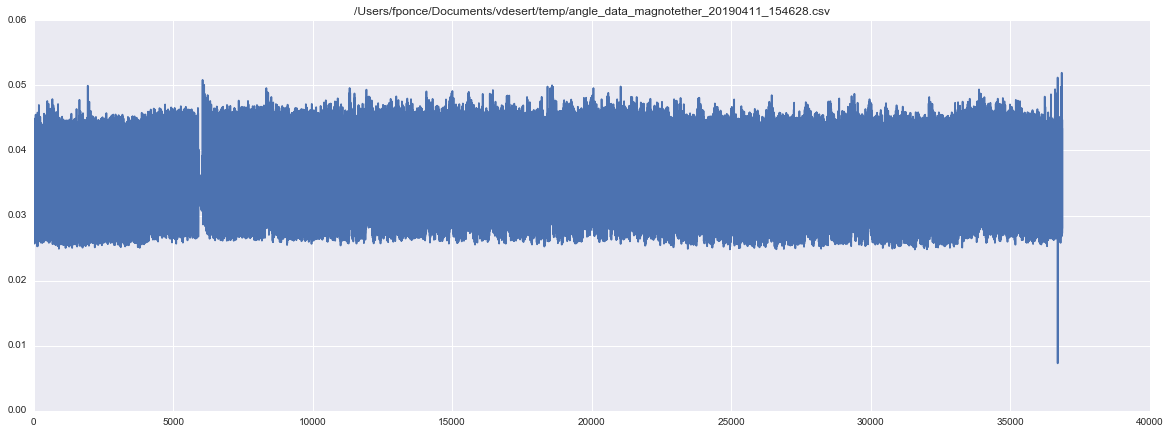

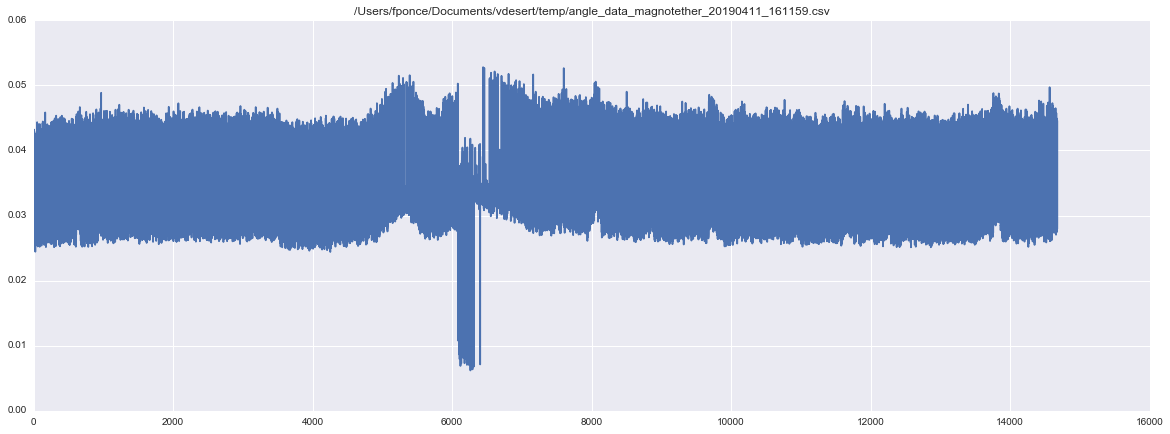

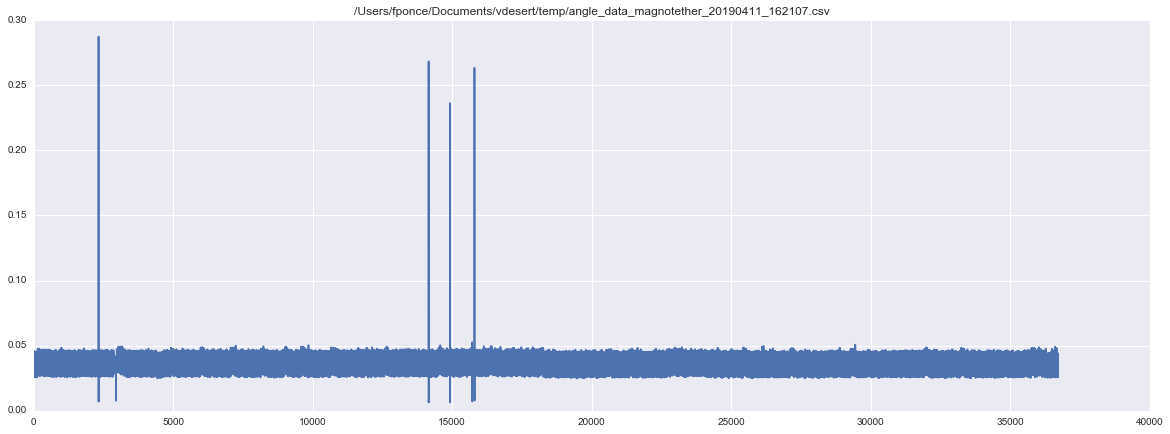

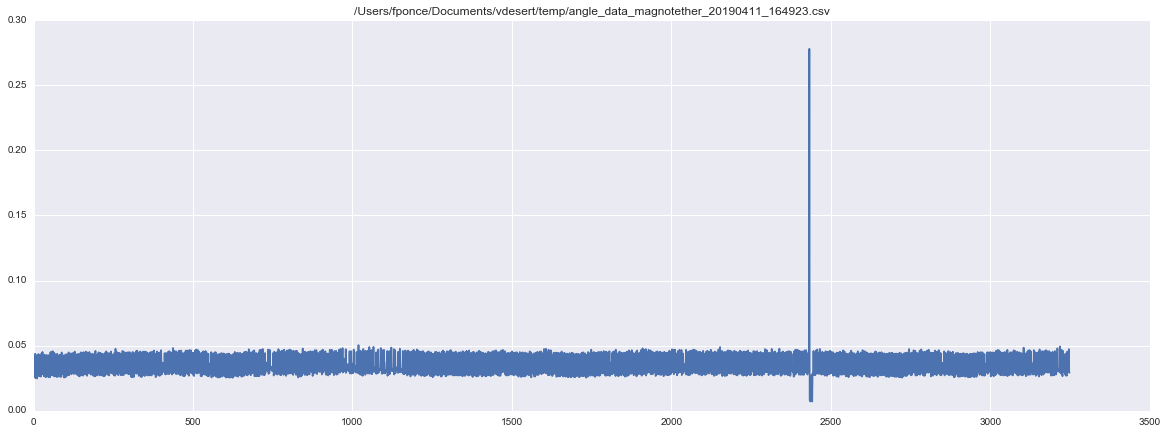

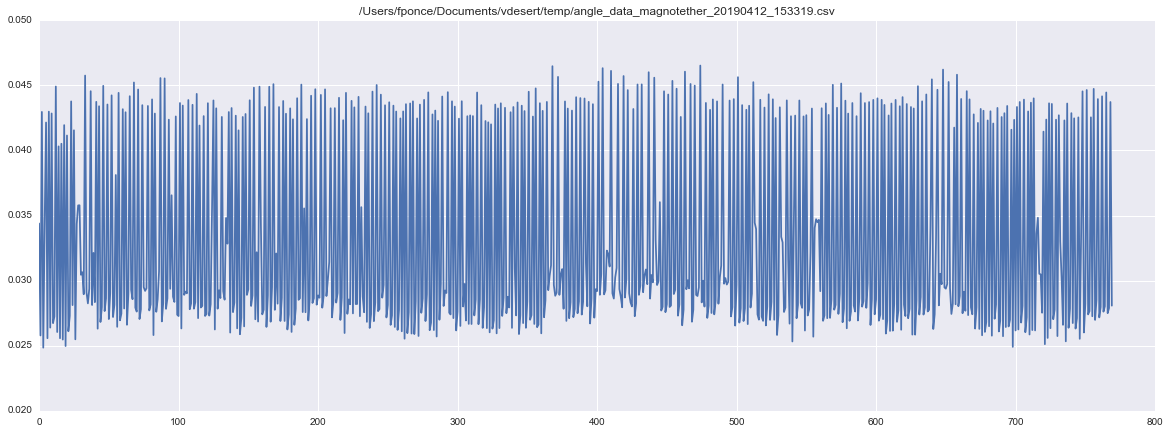

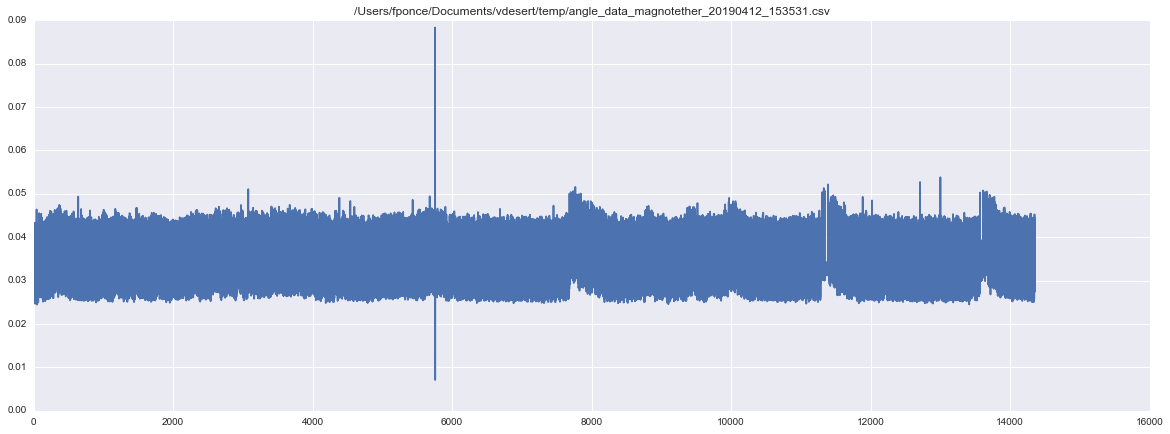

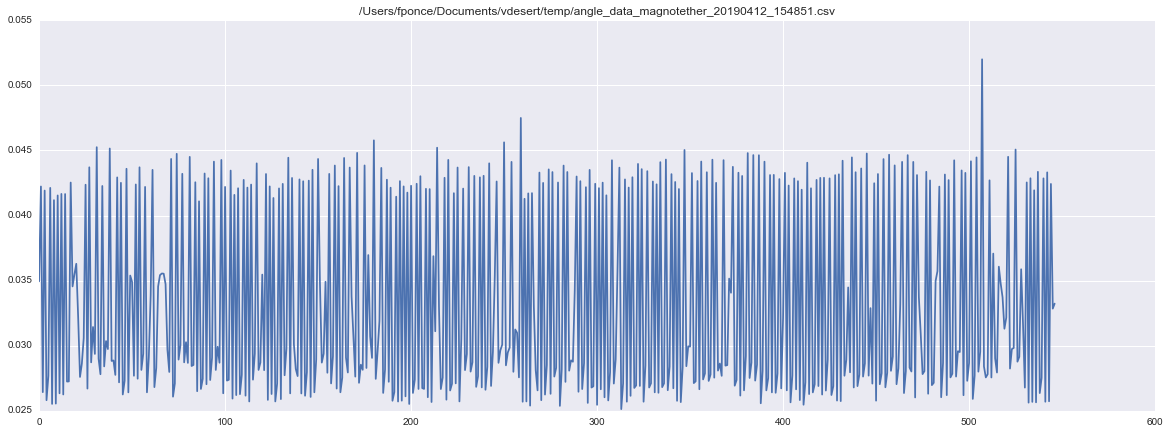

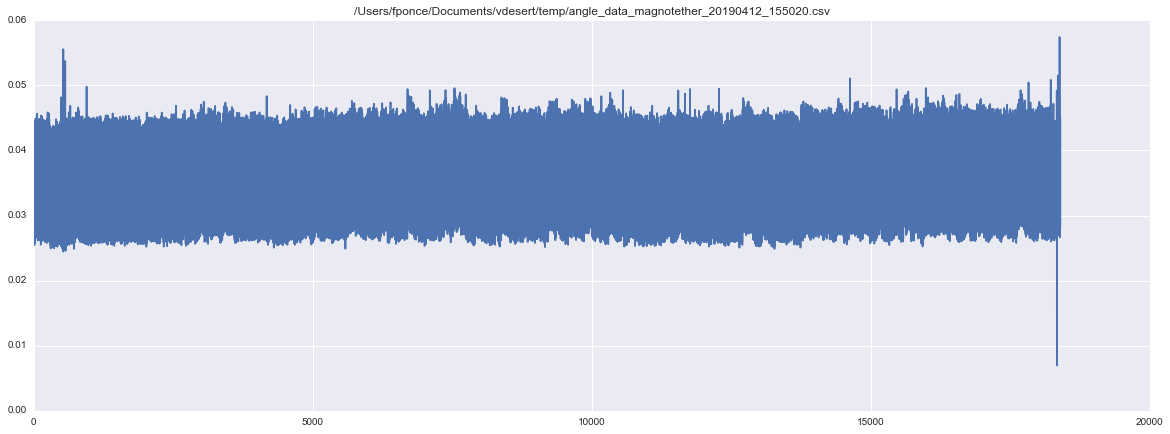

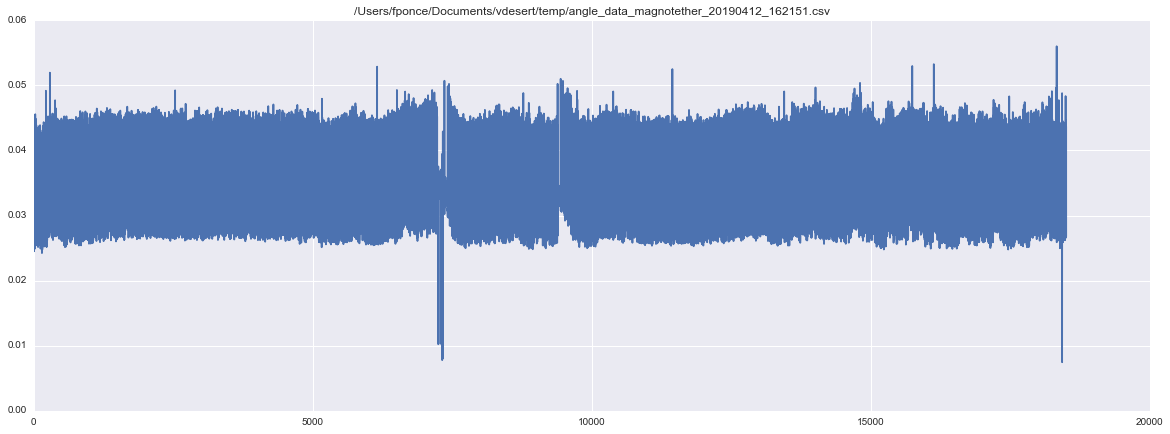

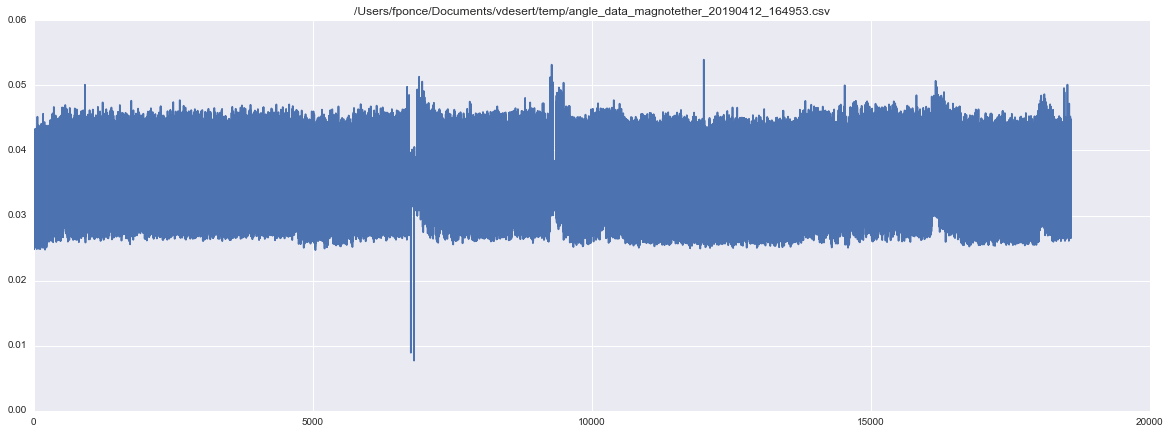

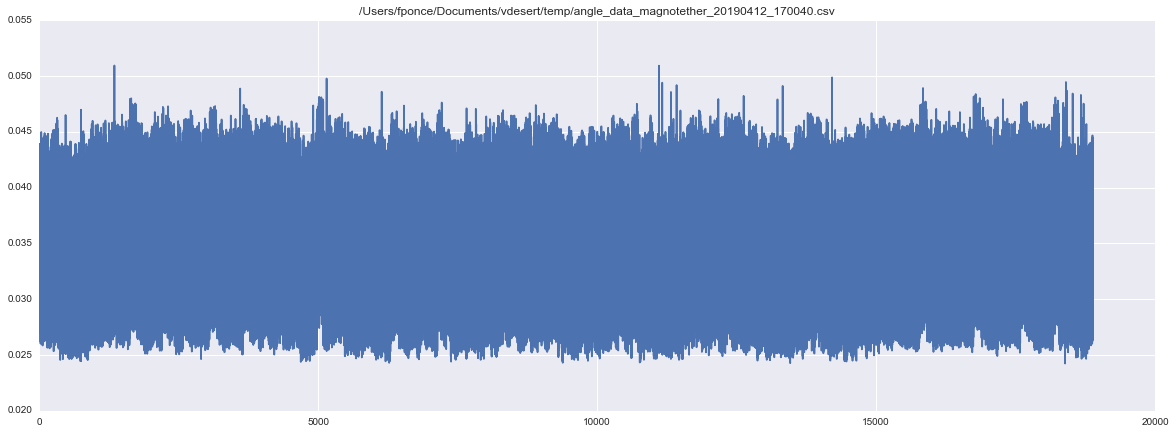

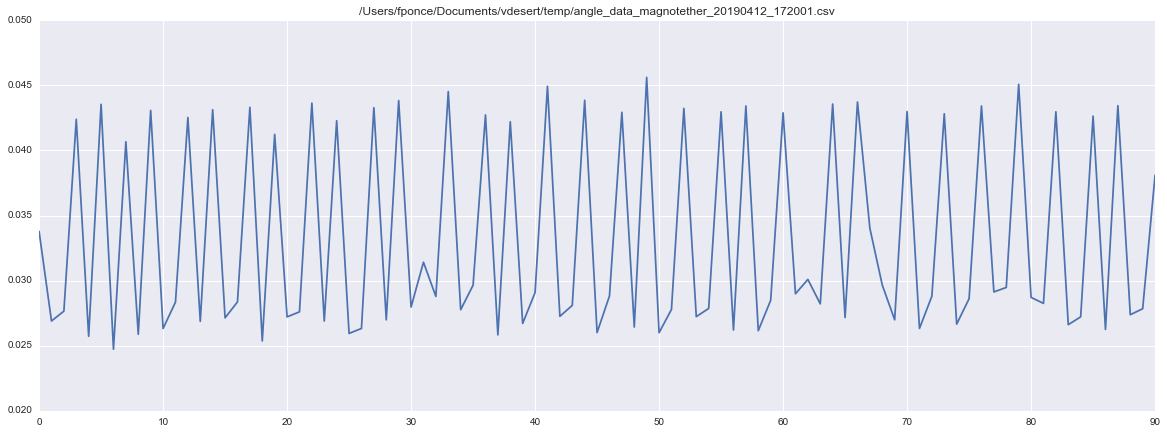

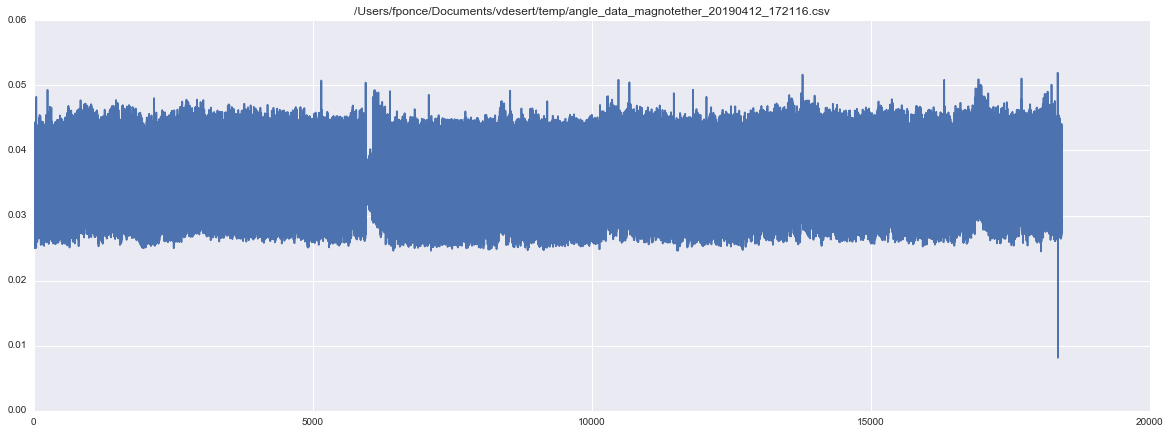

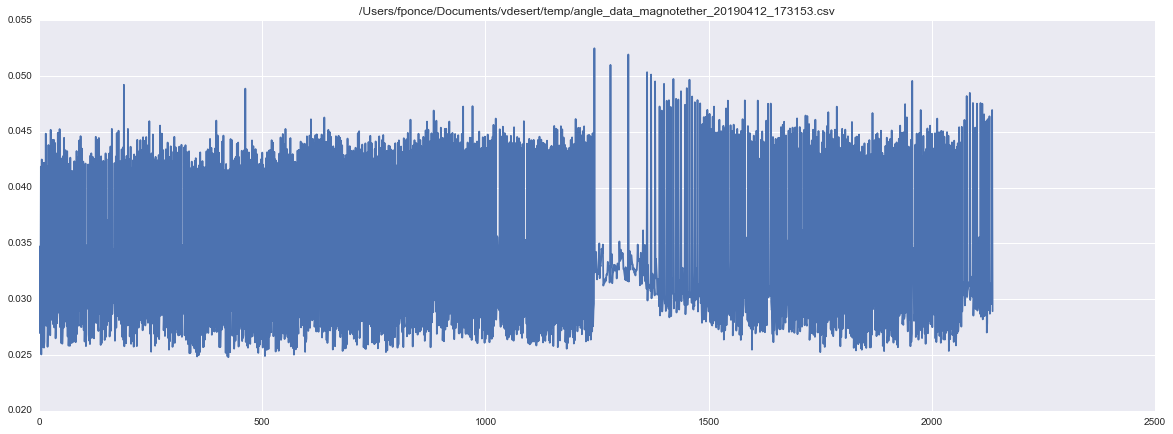

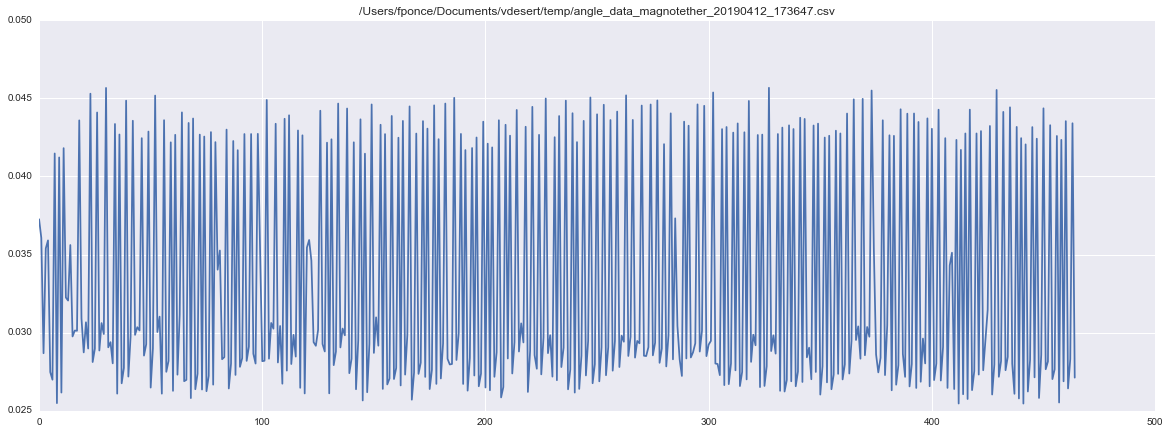

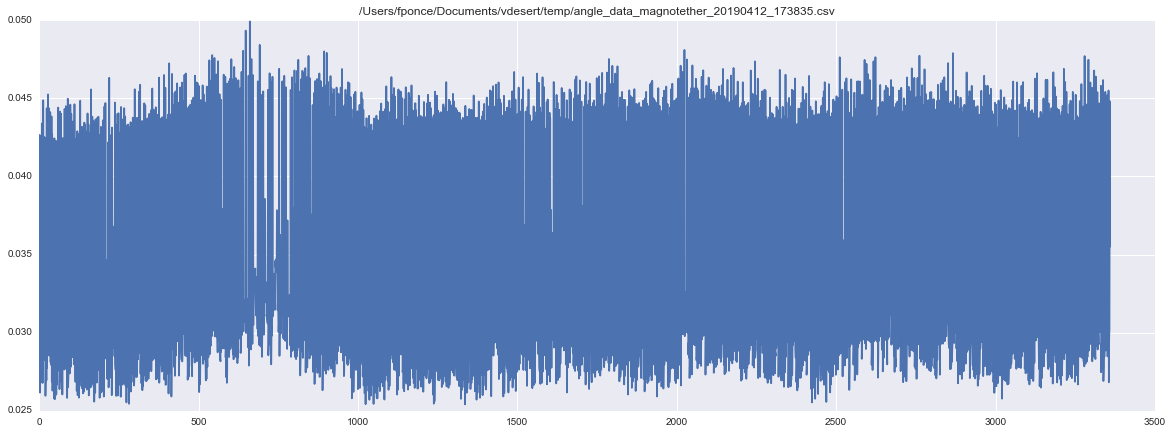

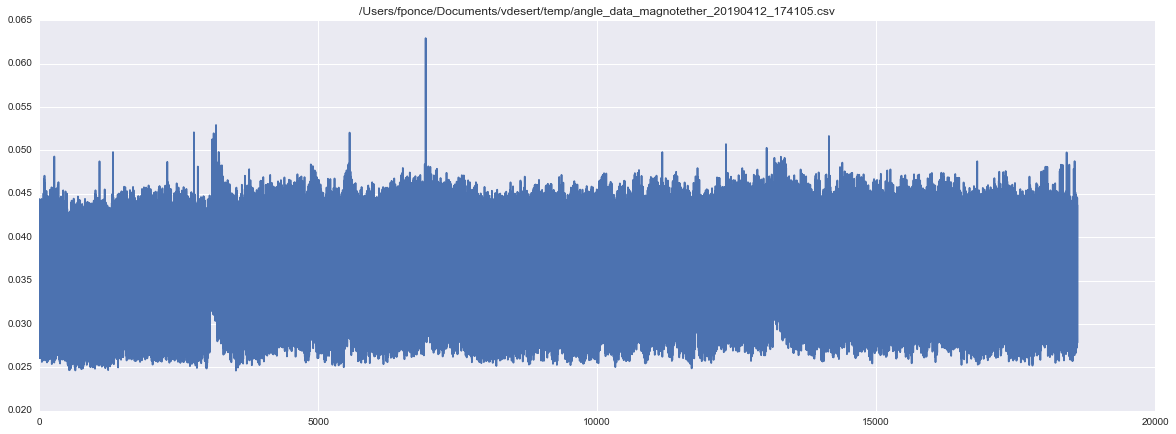

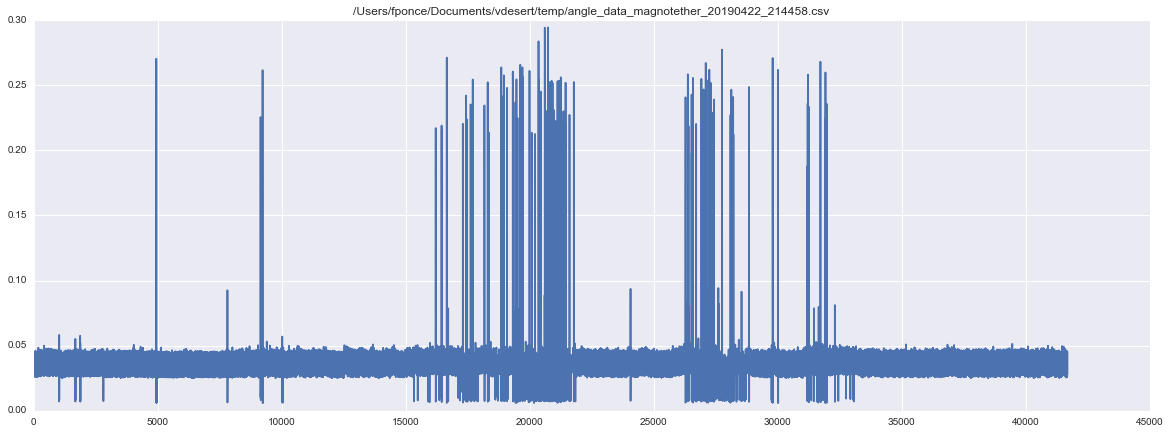

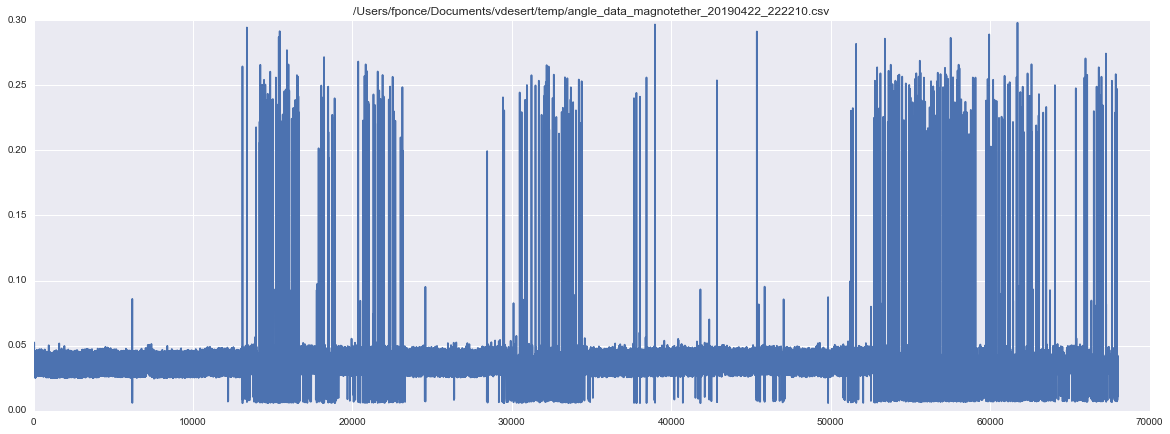

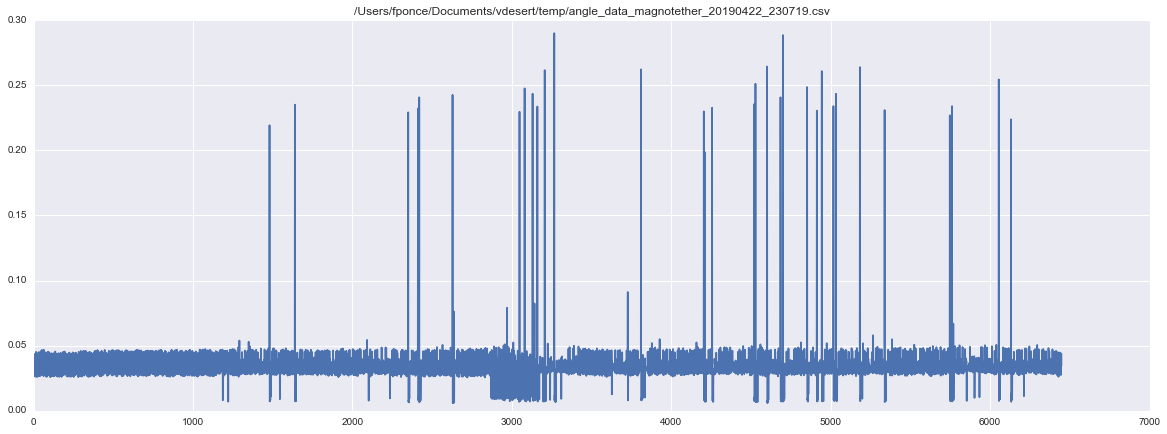

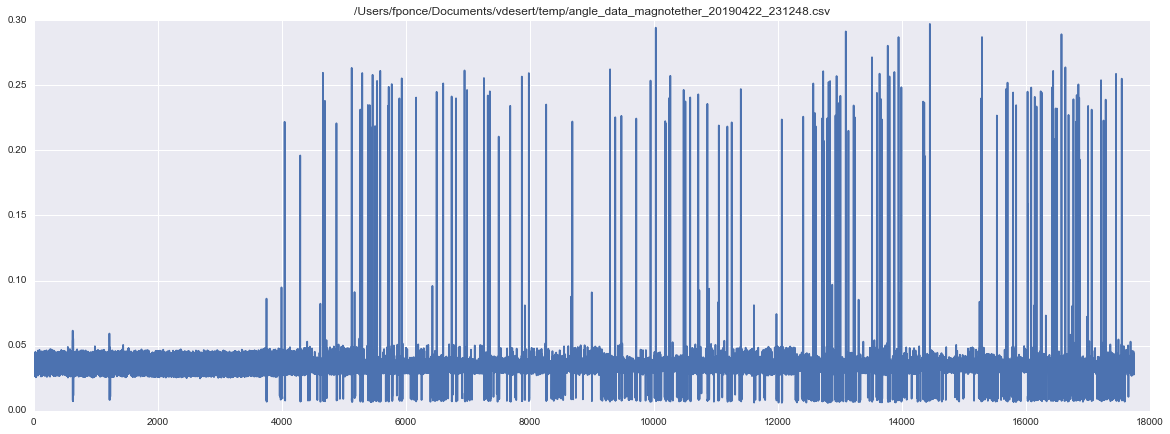

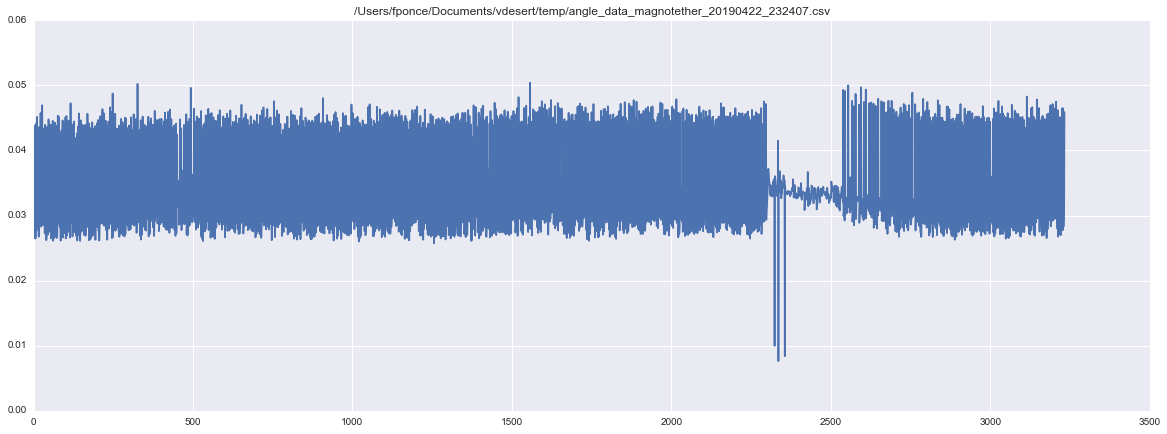

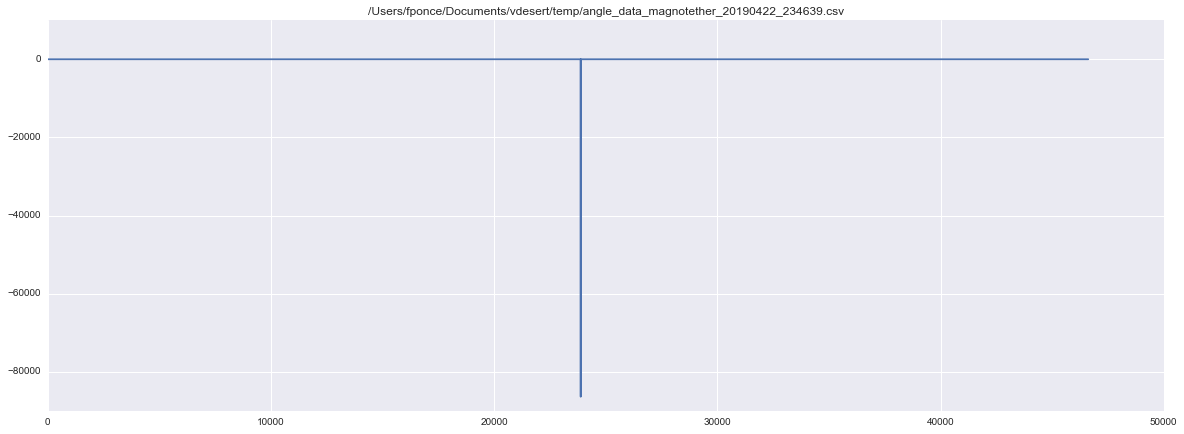

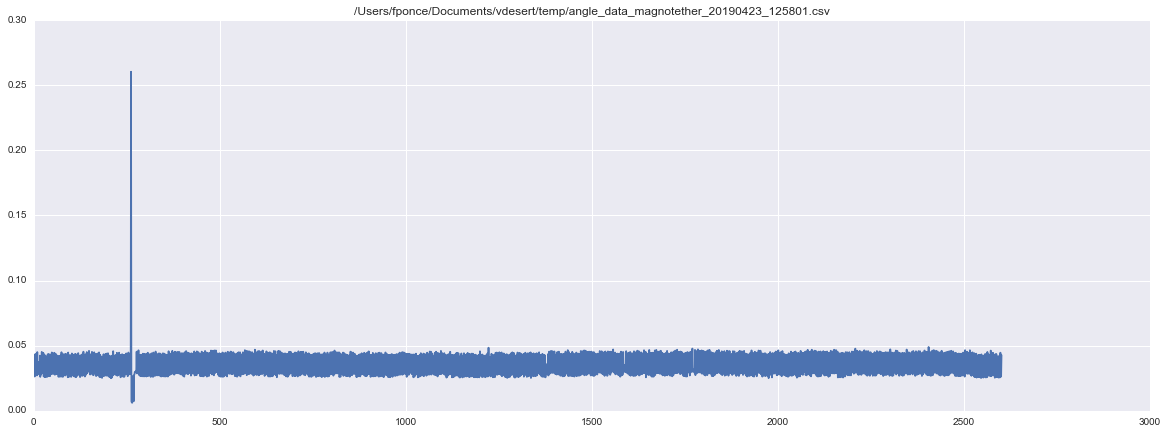

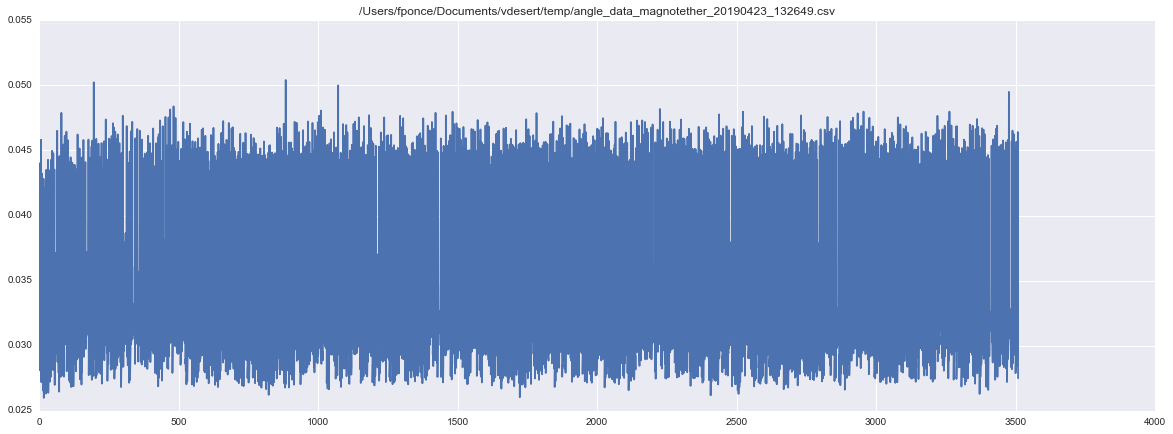

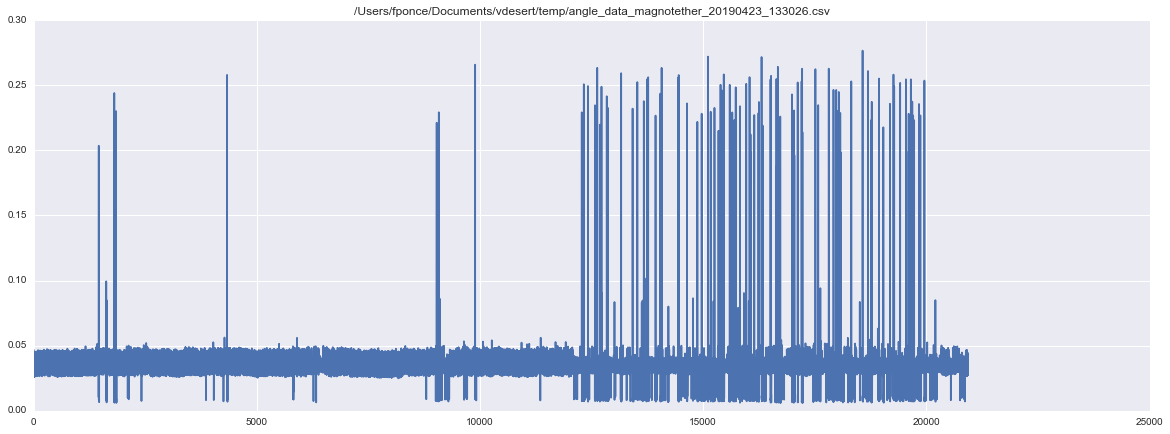

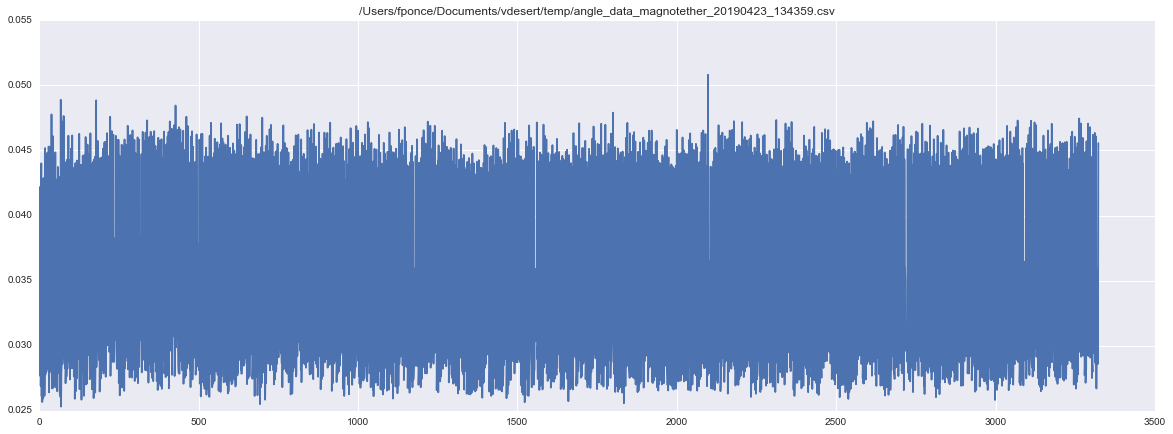

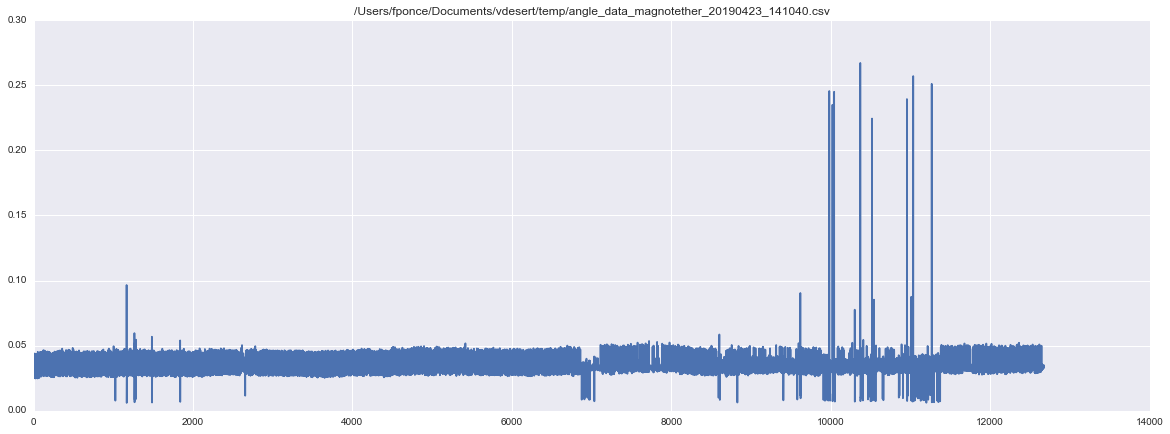

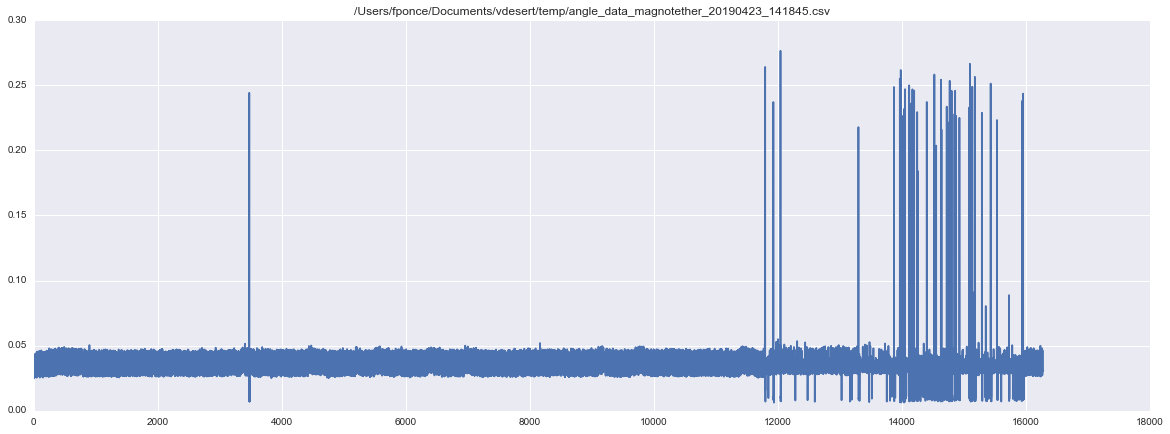

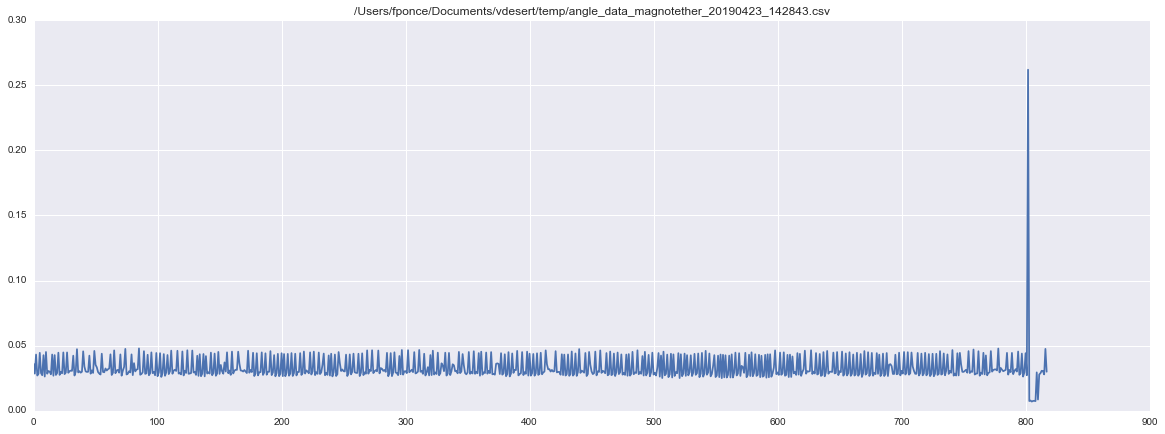

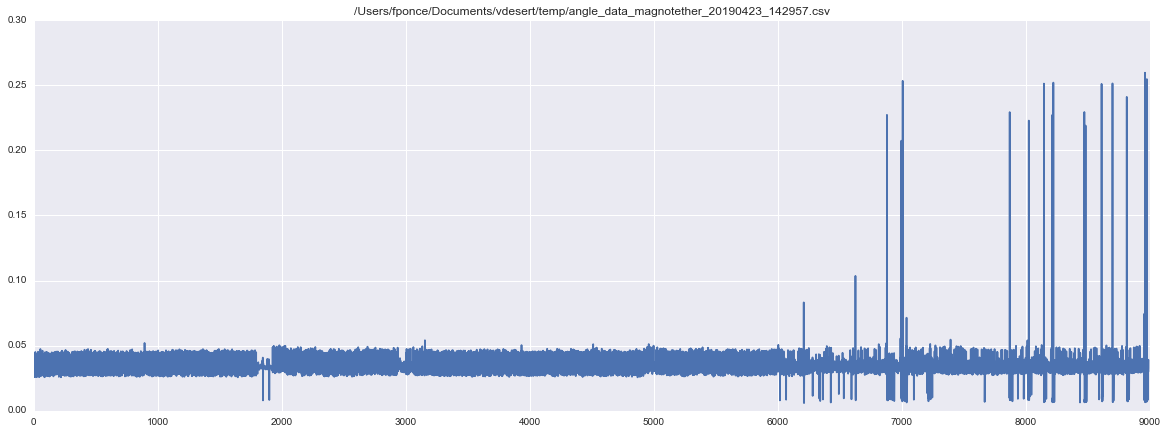

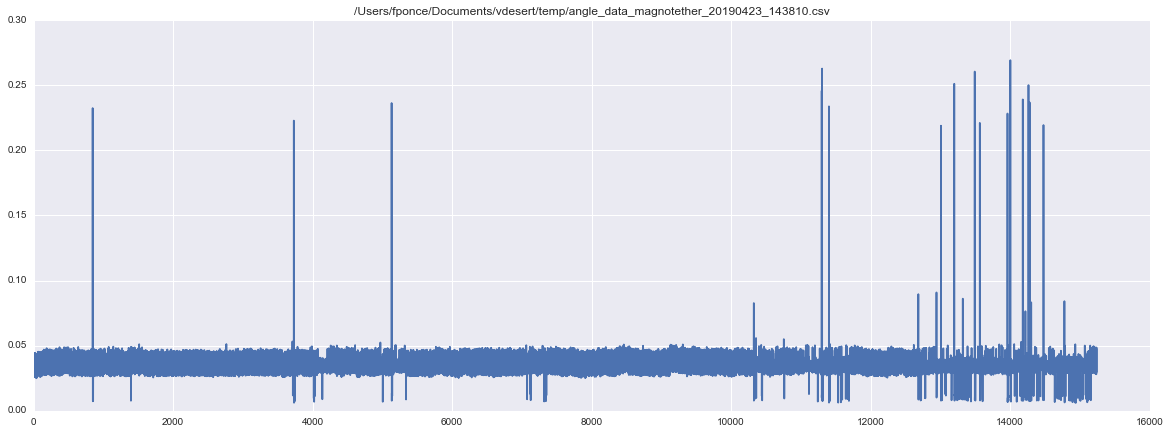

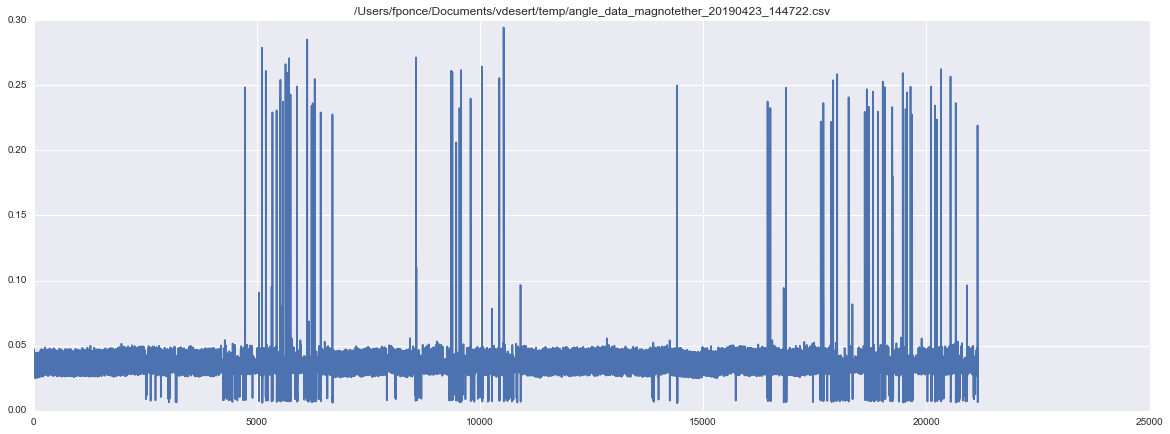

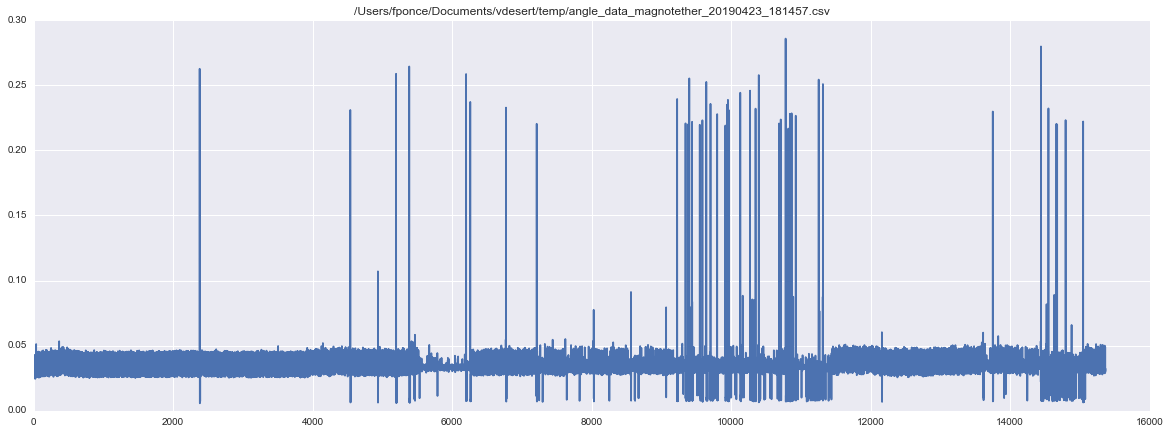

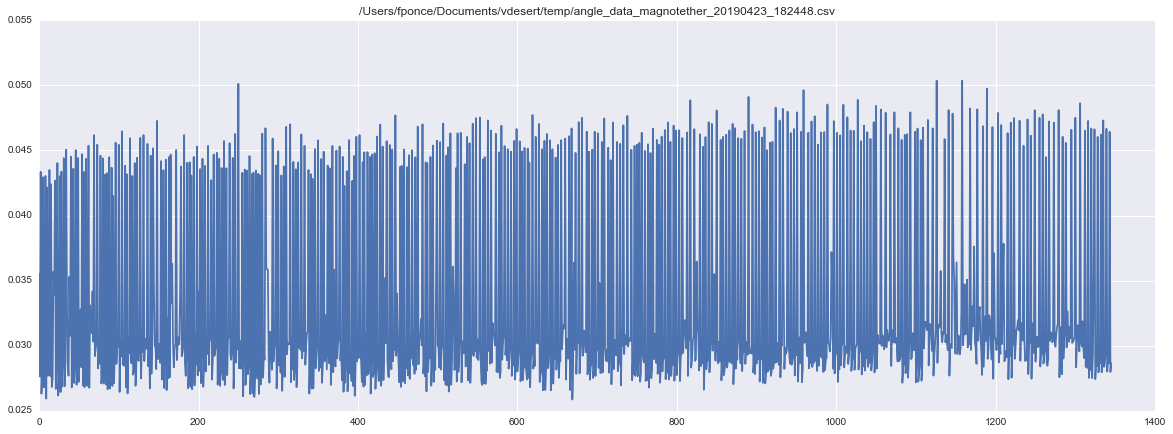

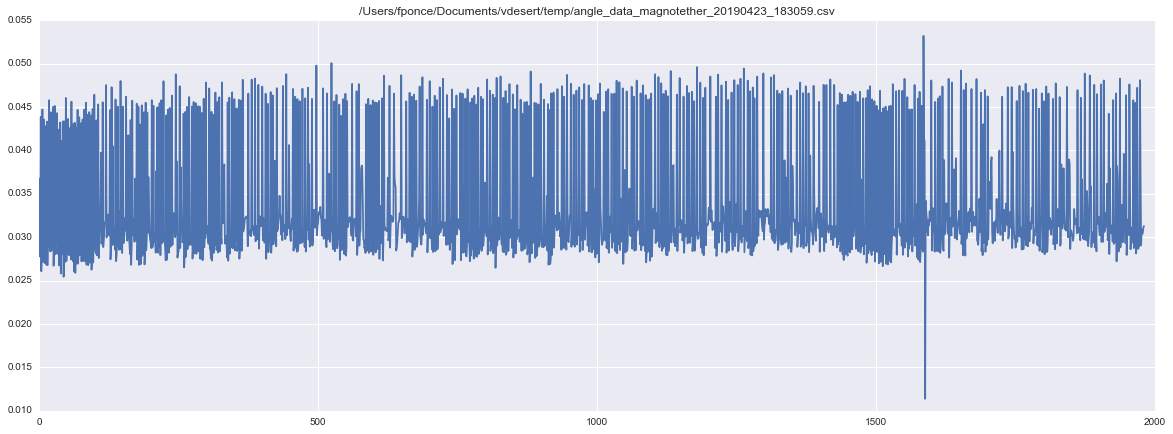

In [12]:
for i in range(len(allframes)):
#     print(len(allframes[i]))
    plt.figure(figsize=(20, 7))
    plt.plot(np.diff(allsecs[i][0:-1]))
#     print(len(allframes[i]))
#     plt.xlim(0,1800)
    plt.title(datapaths[i])

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


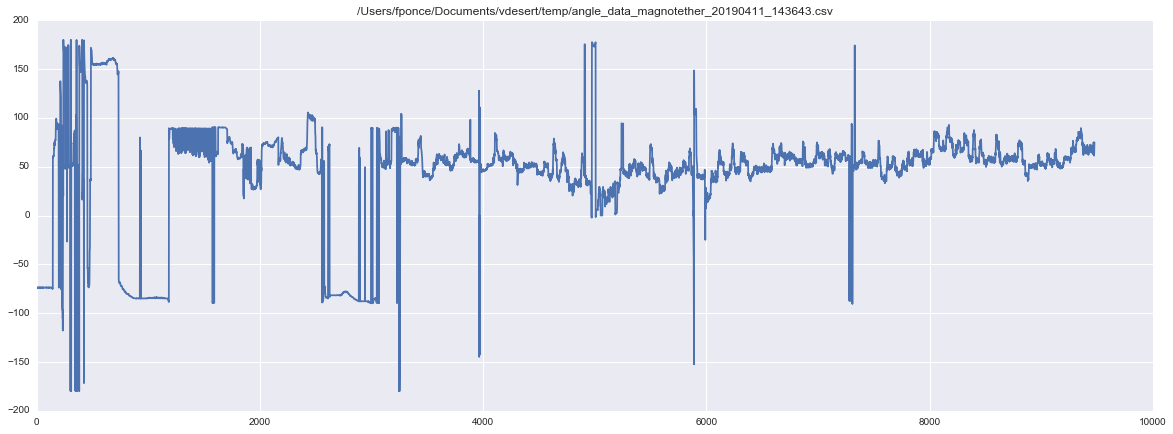

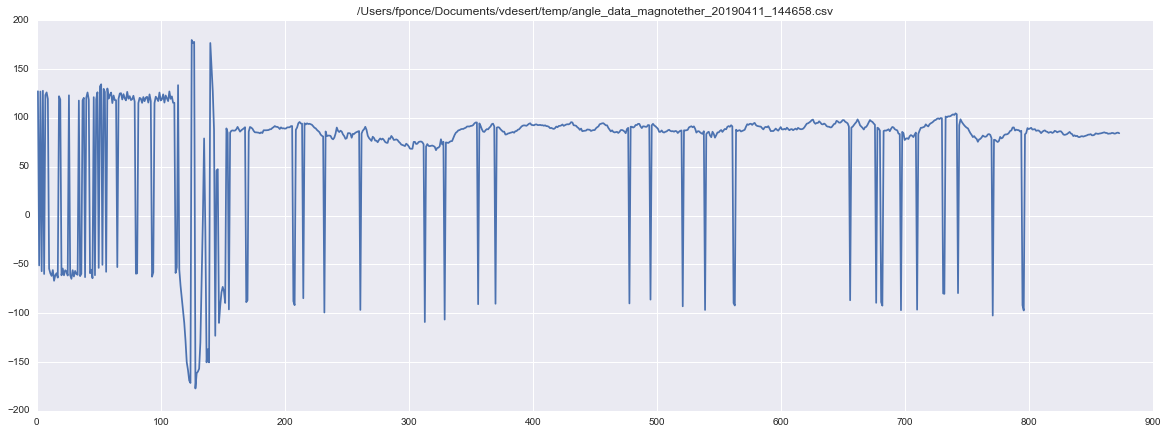

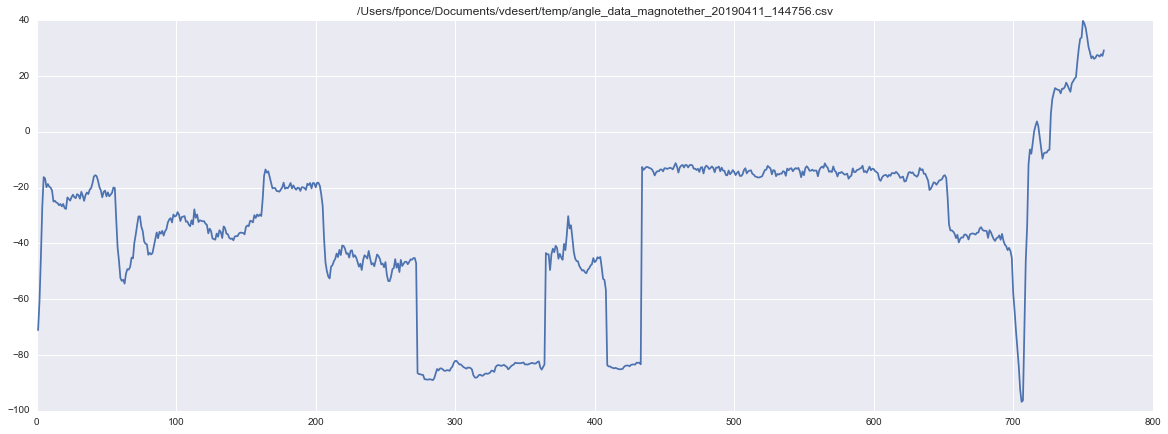

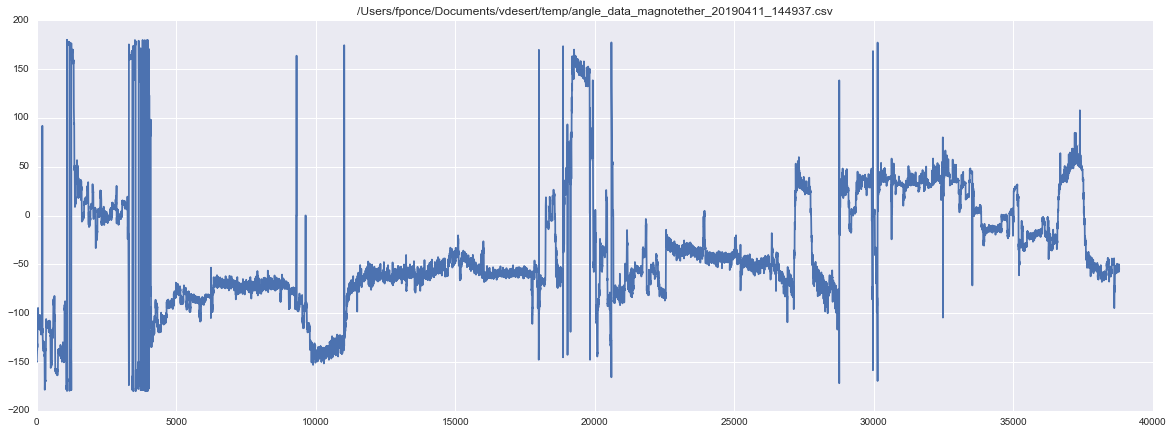

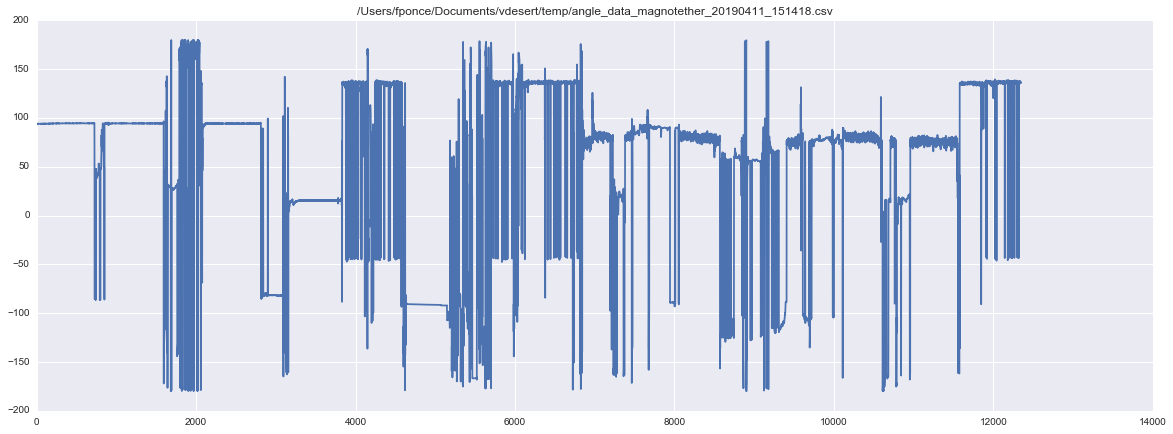

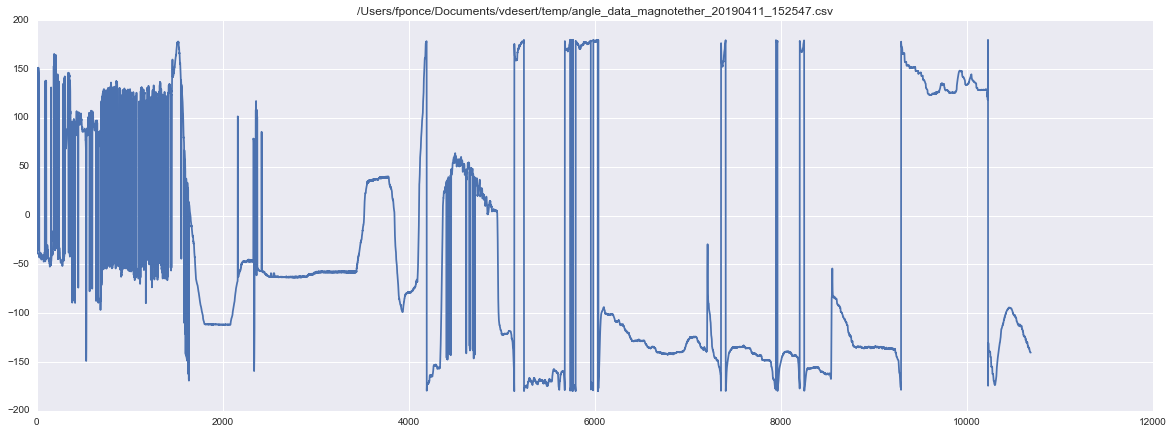

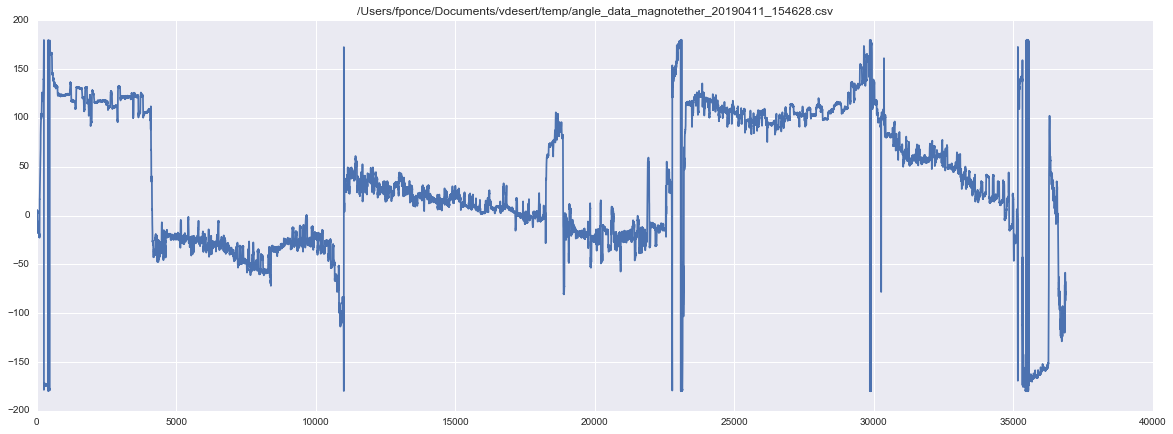

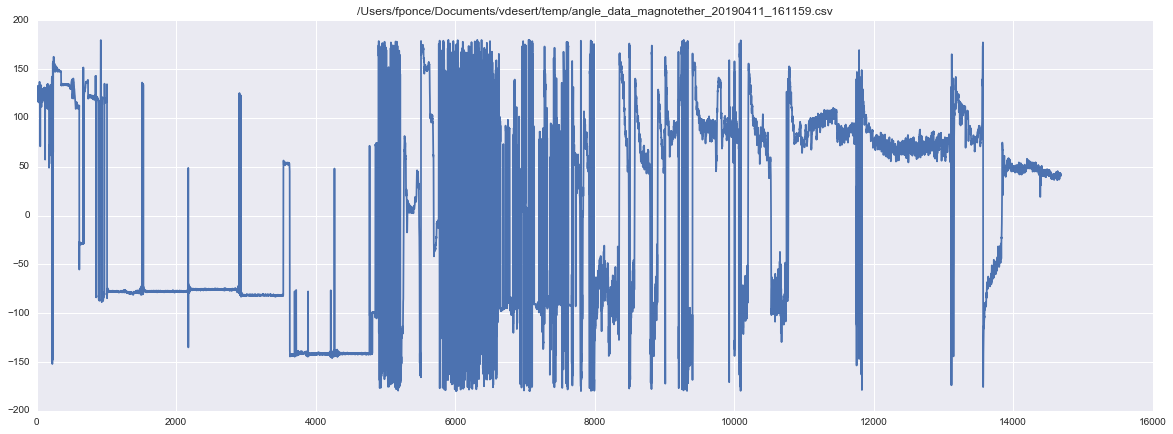

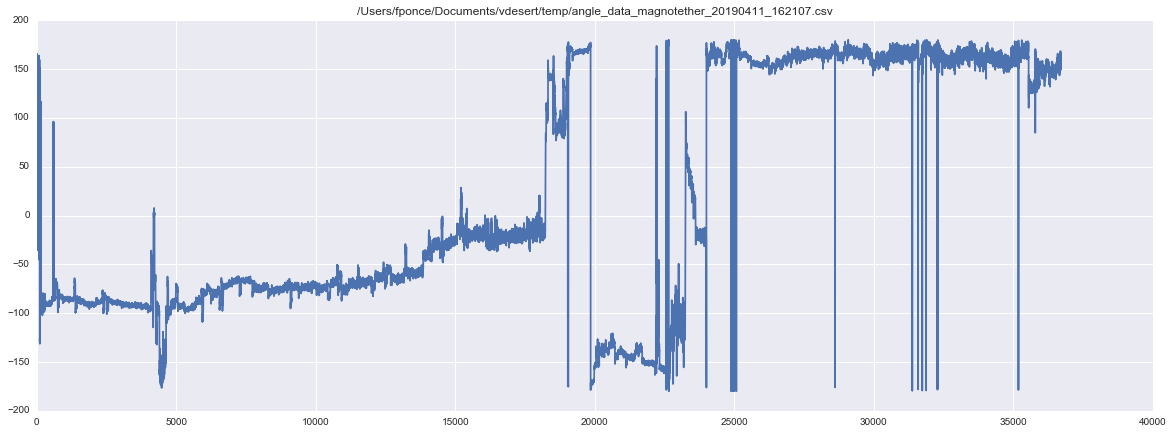

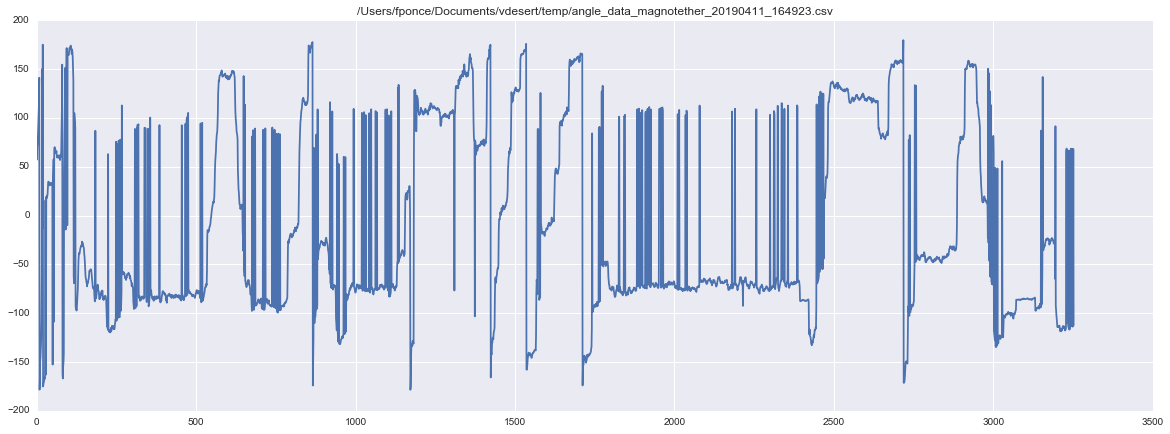

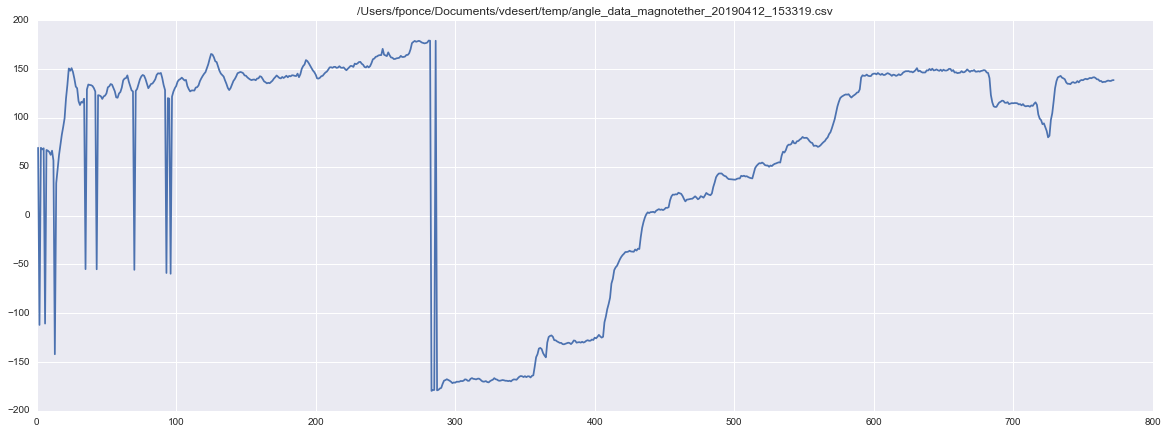

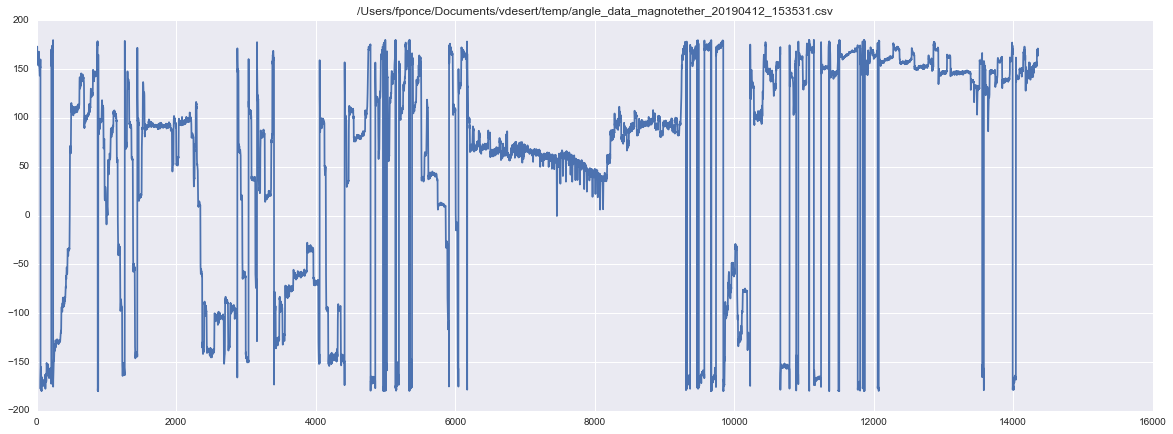

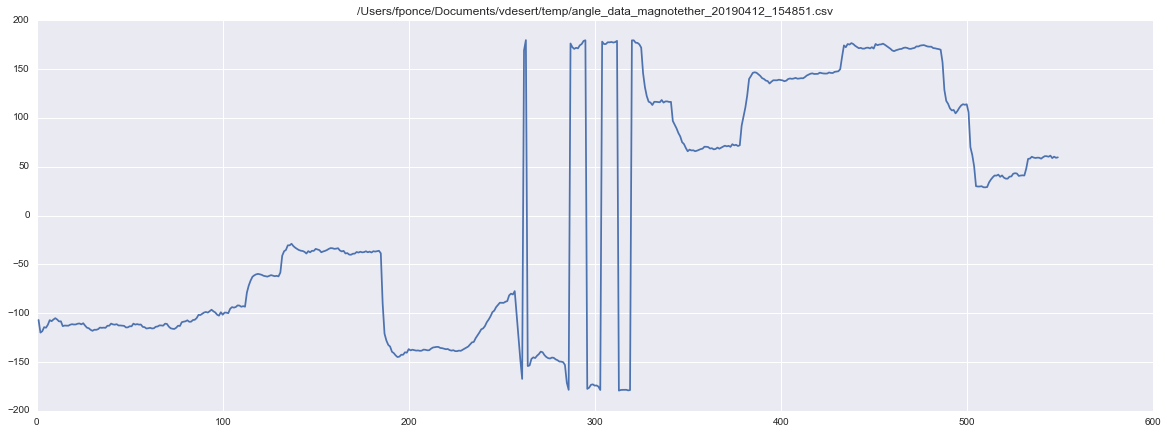

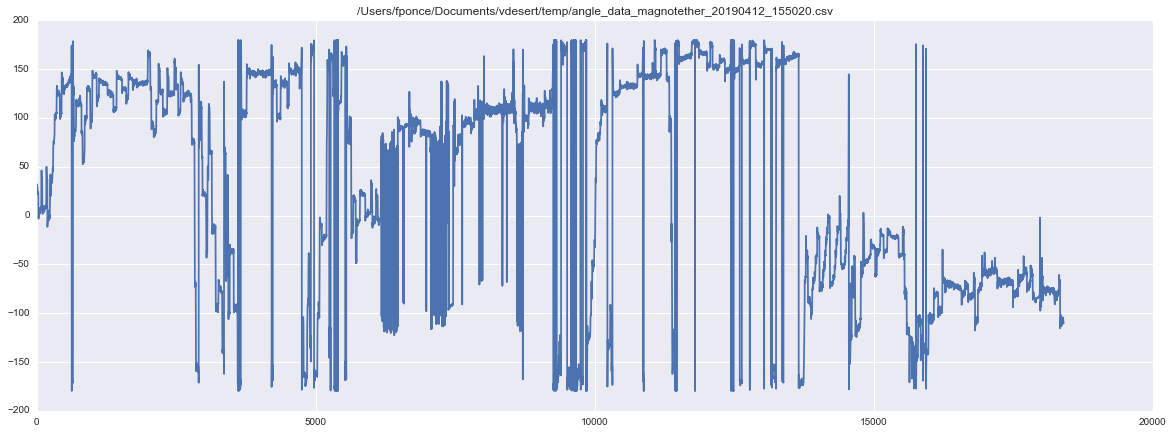

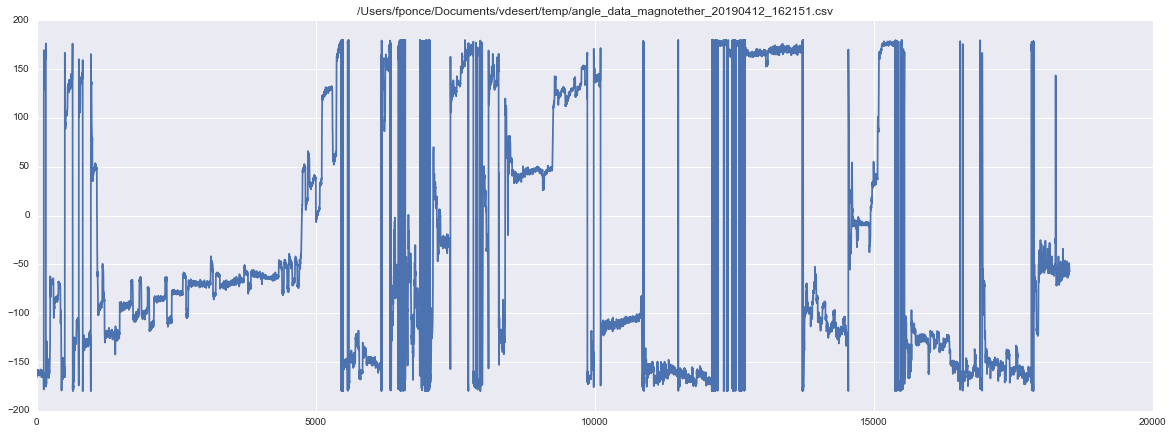

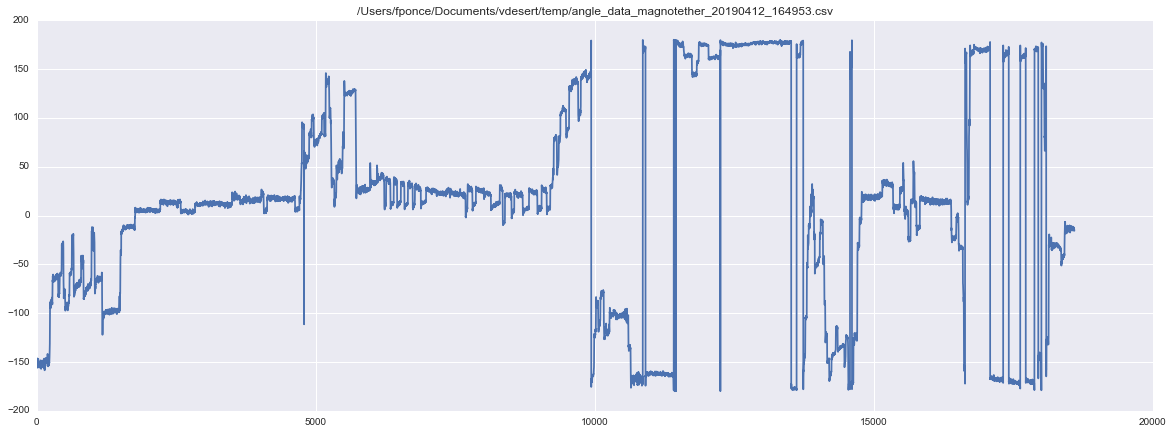

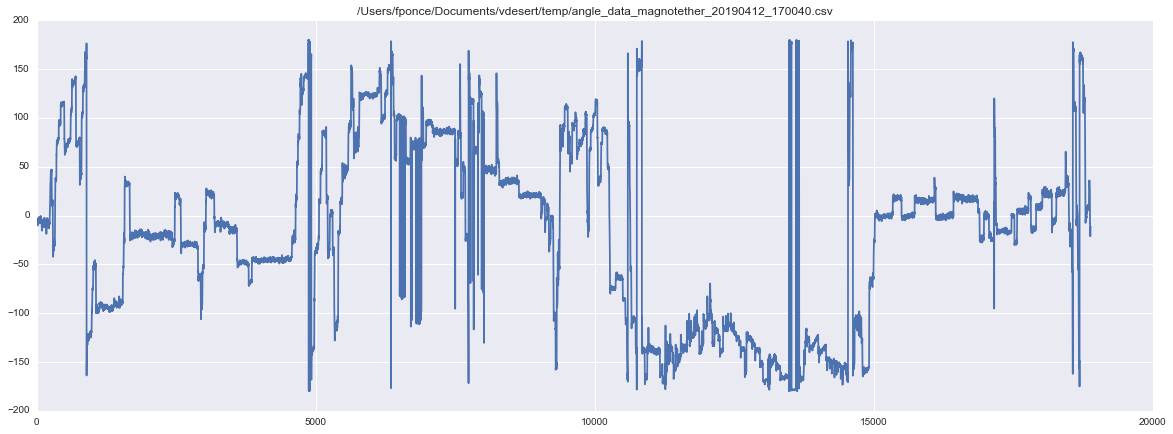

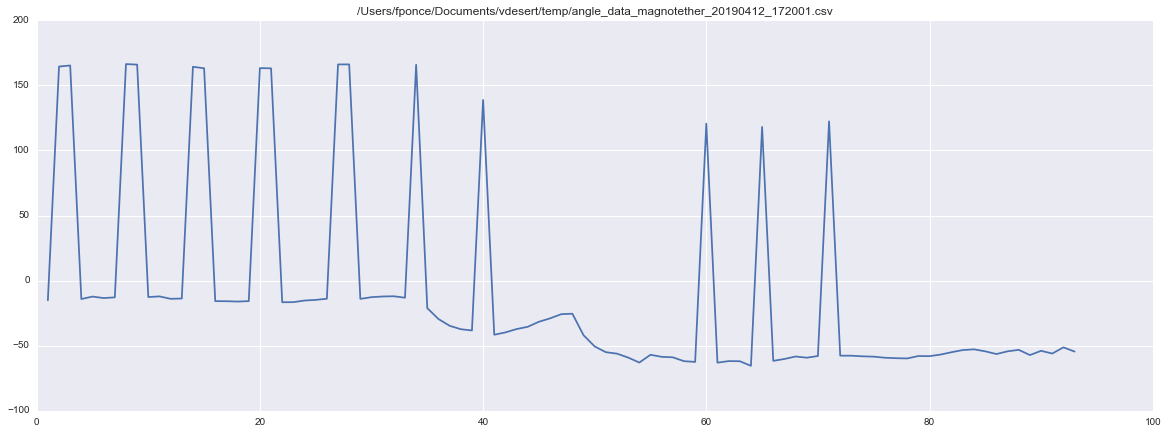

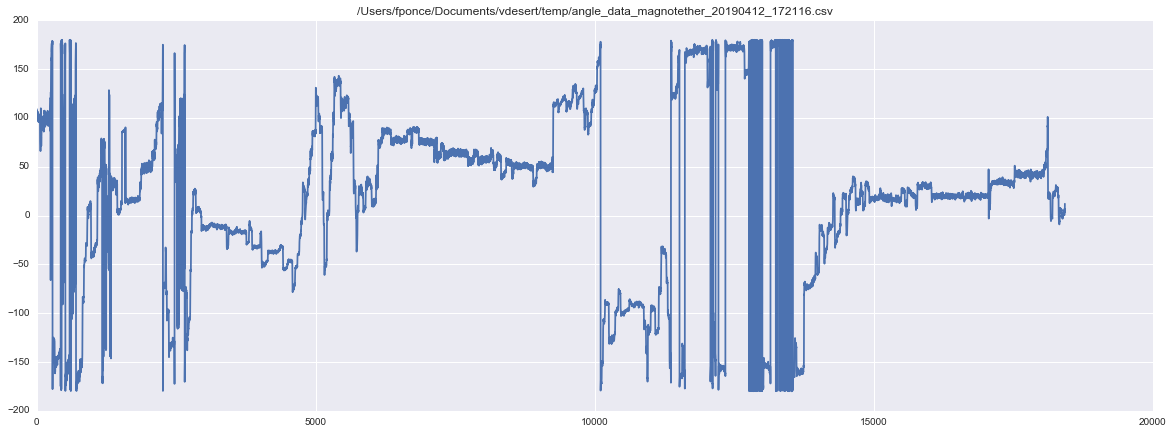

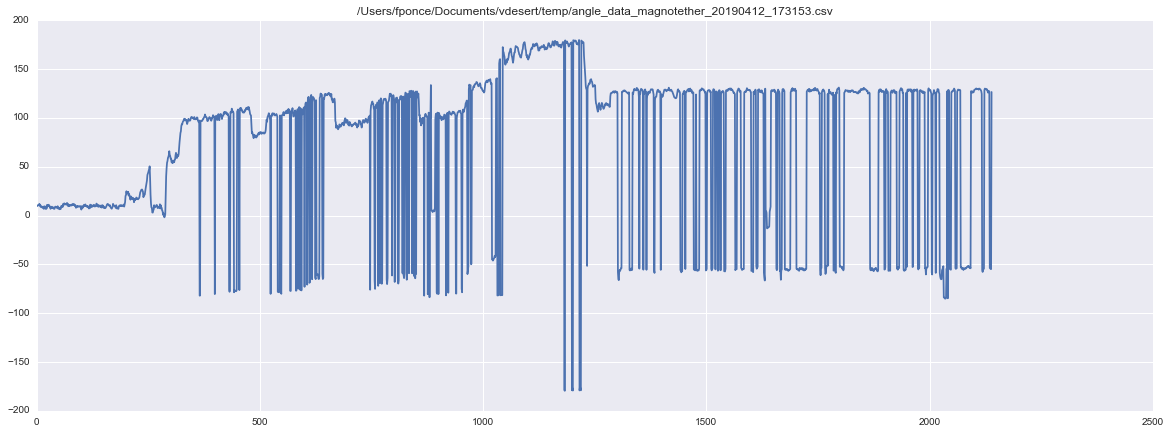

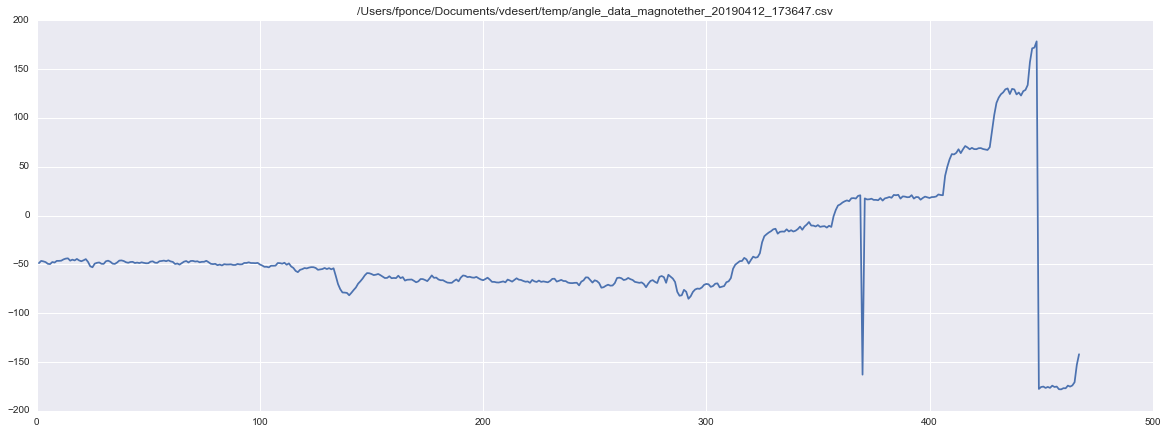

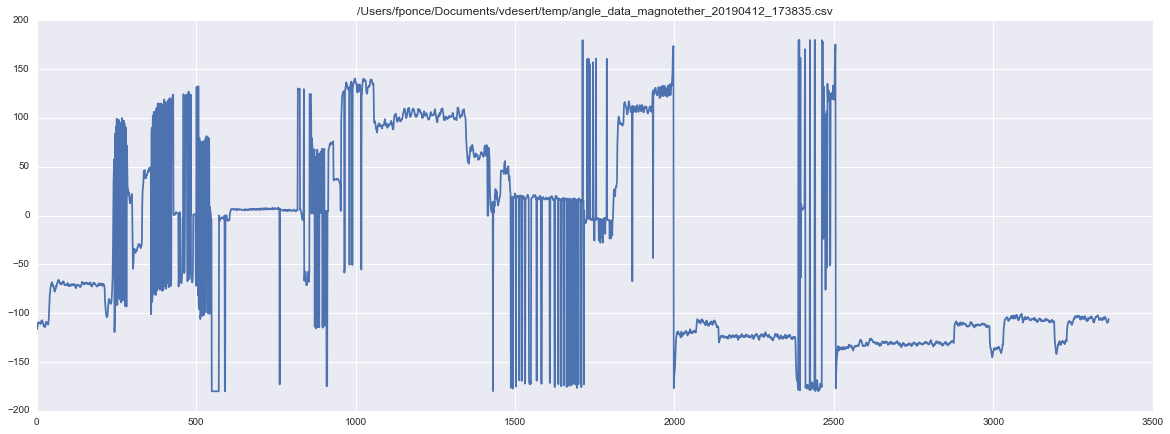

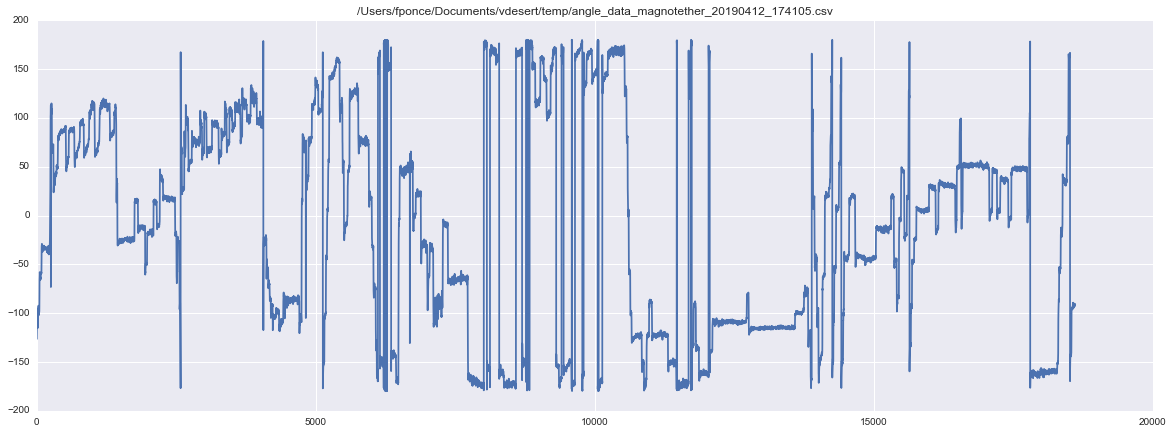

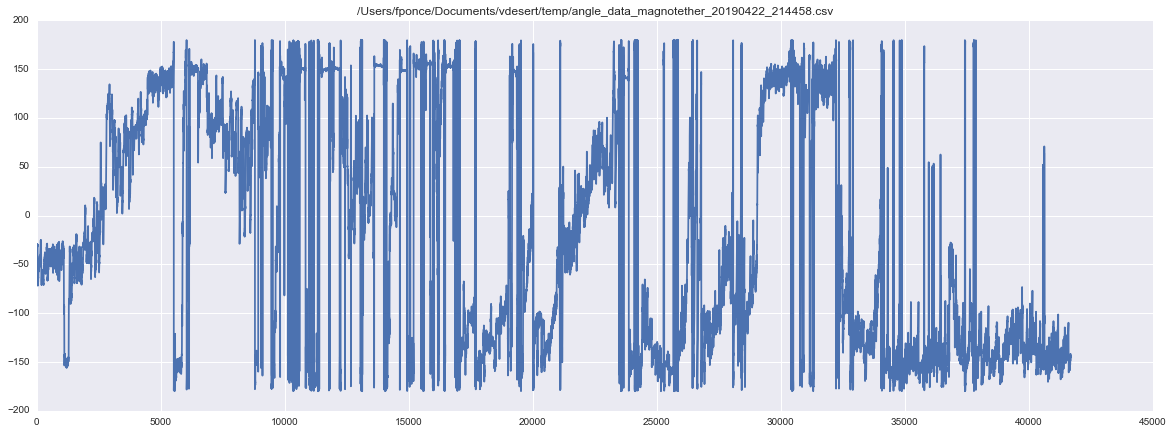

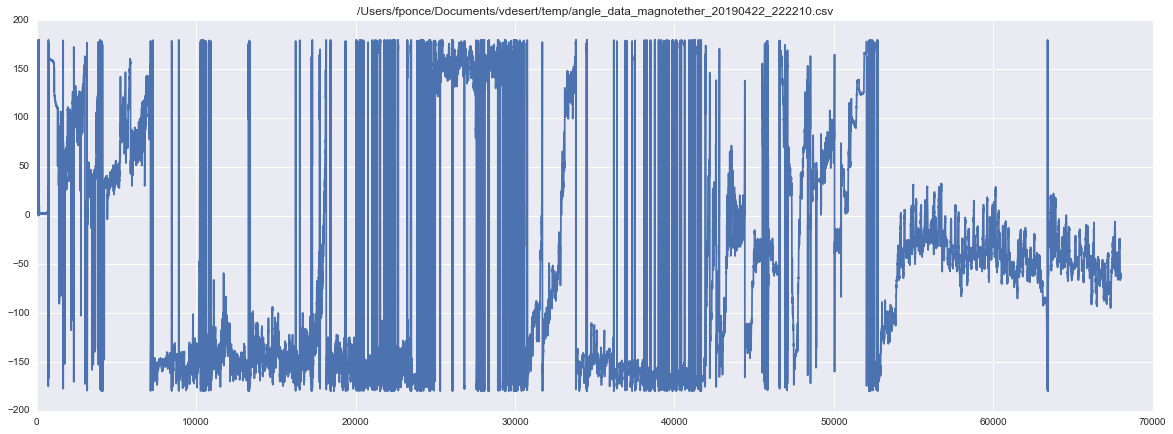

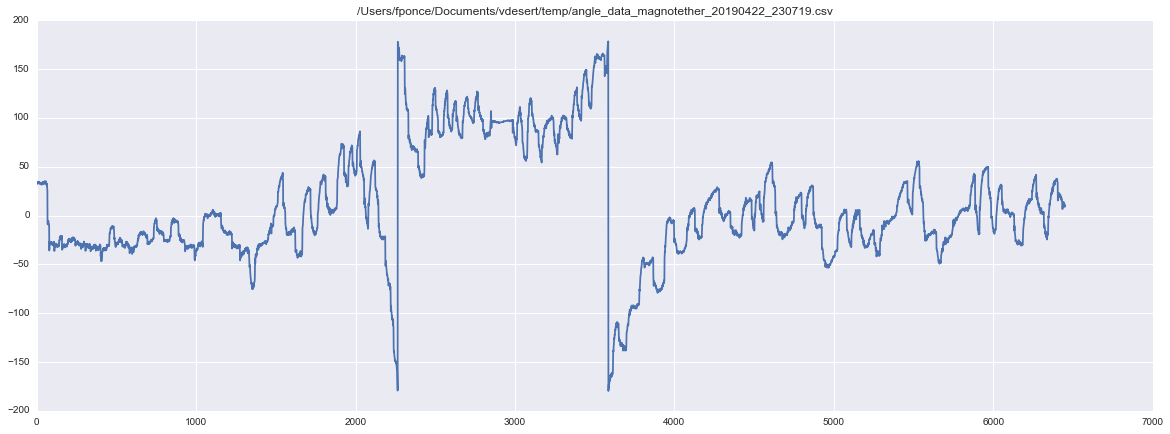

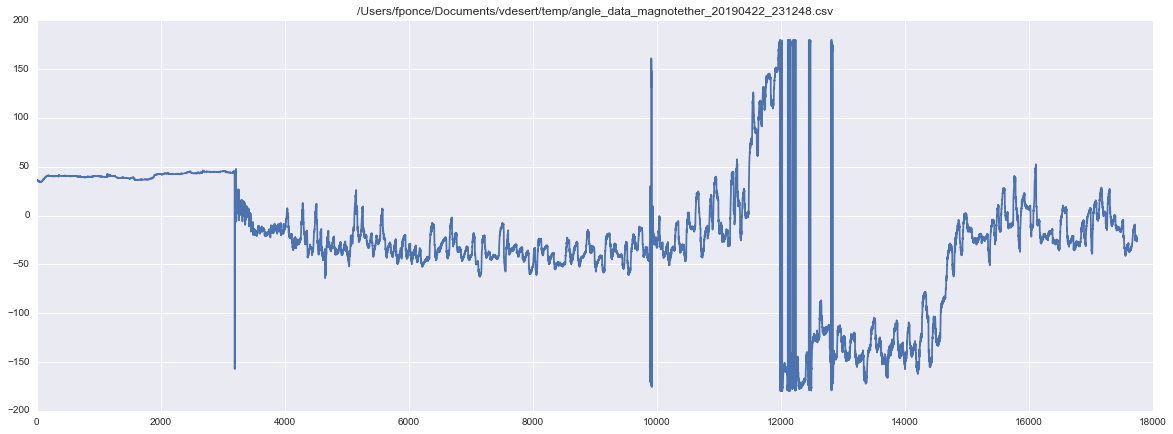

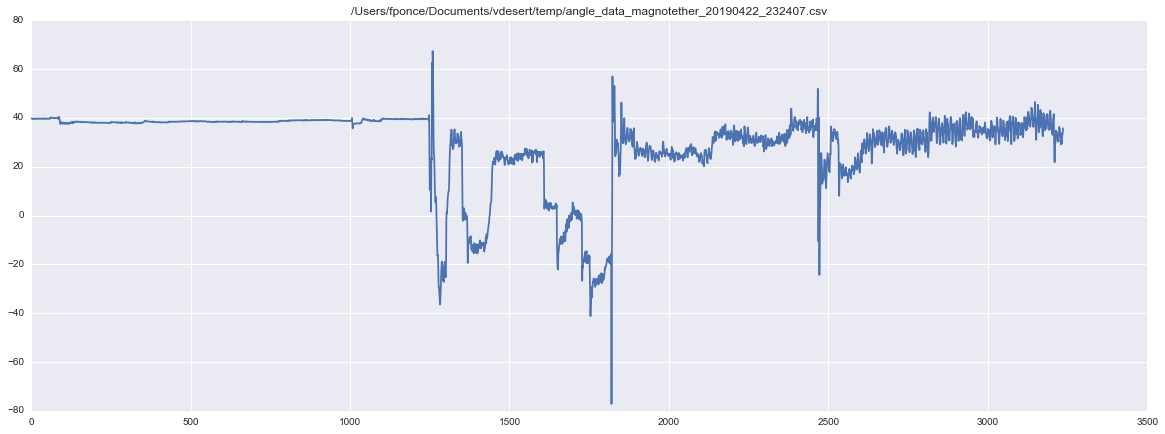

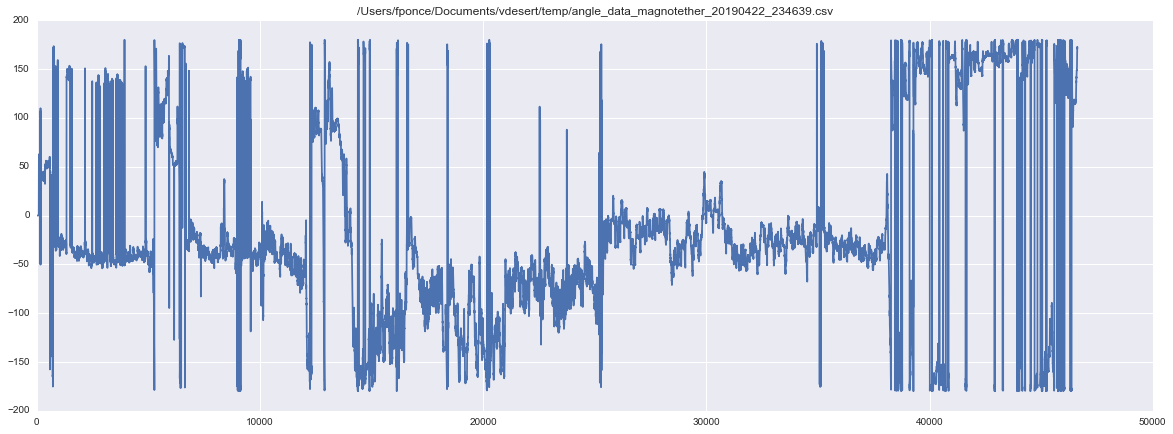

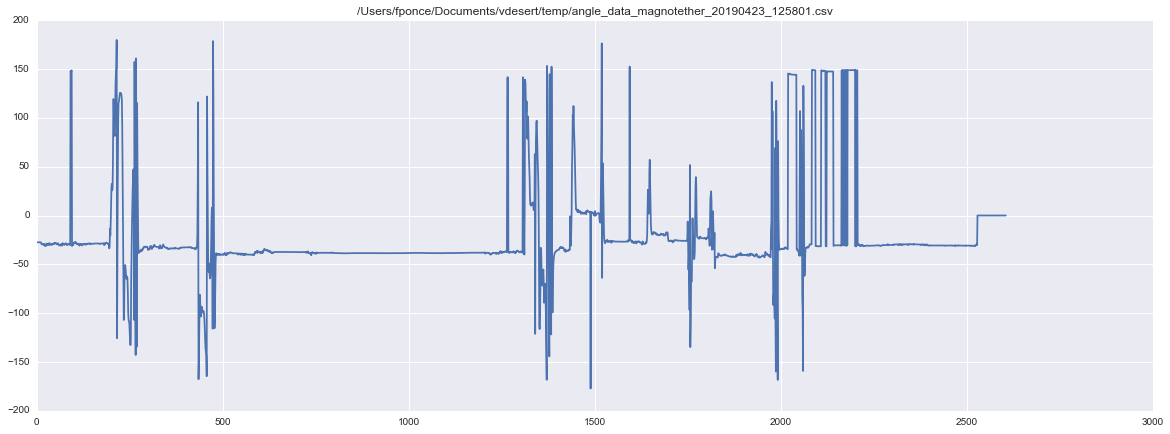

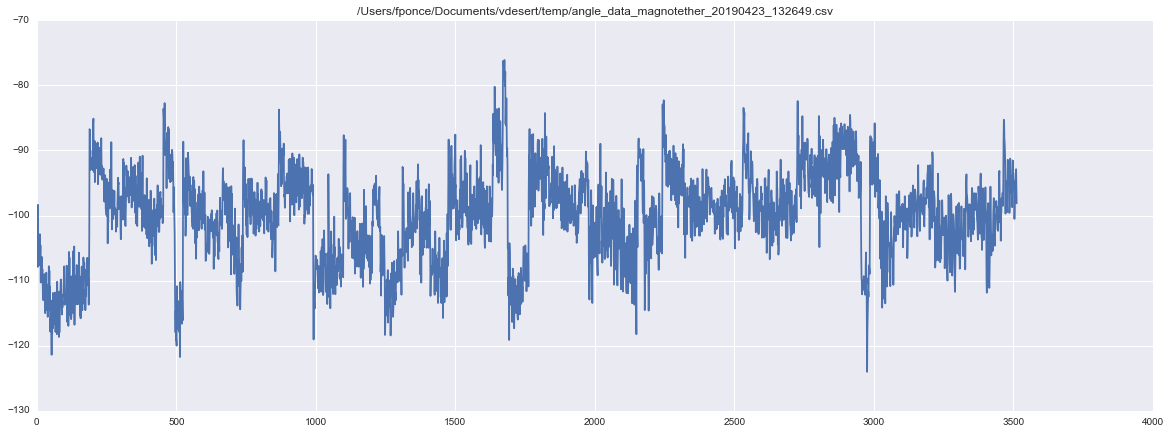

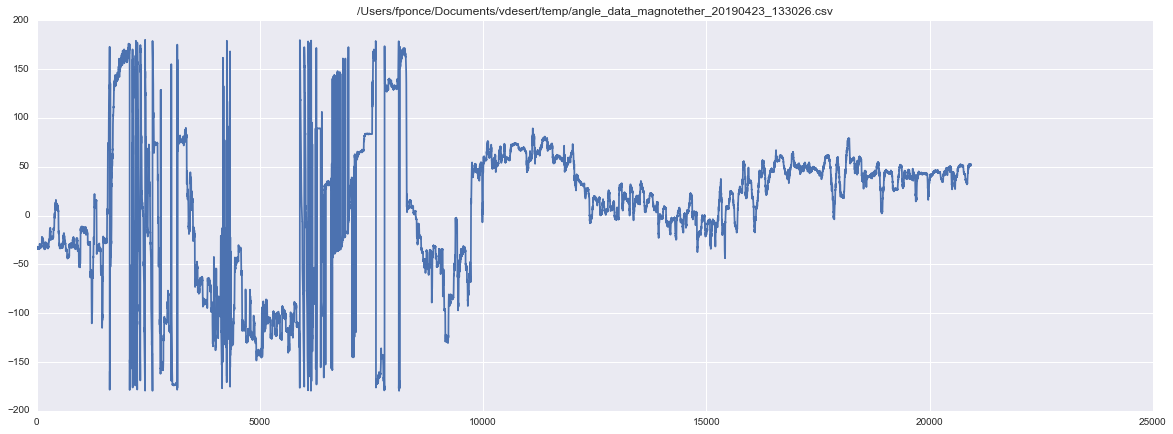

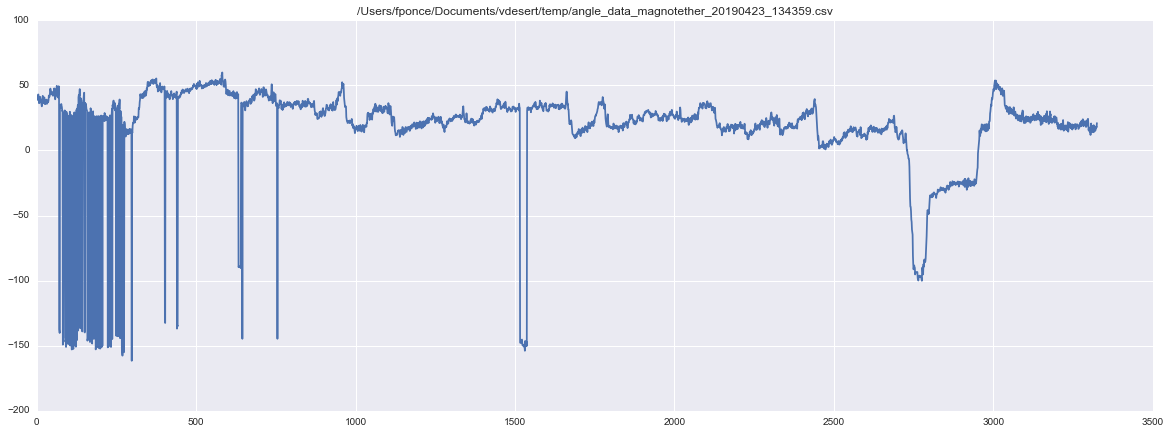

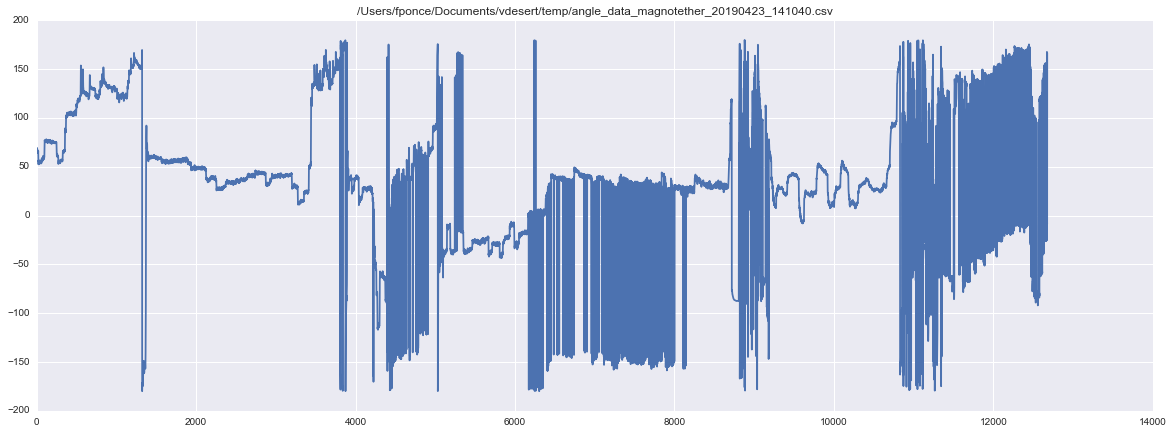

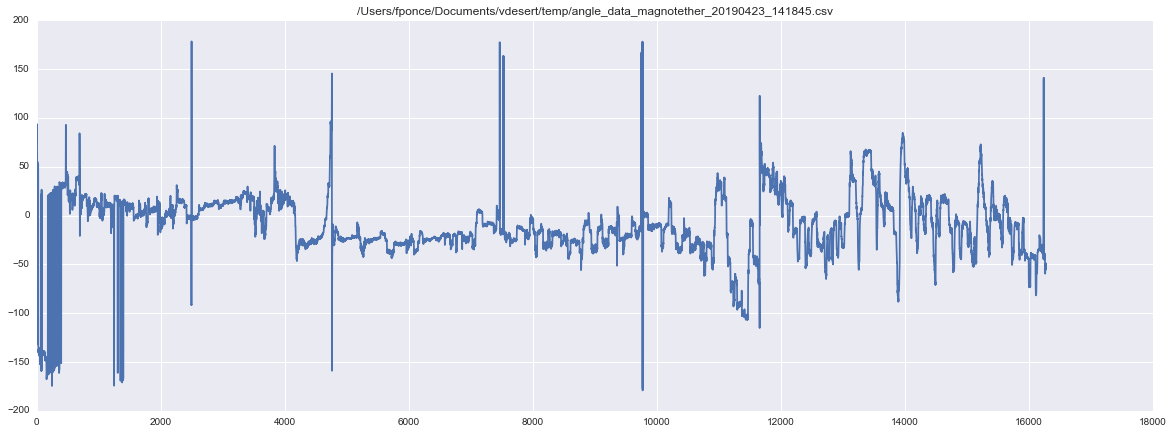

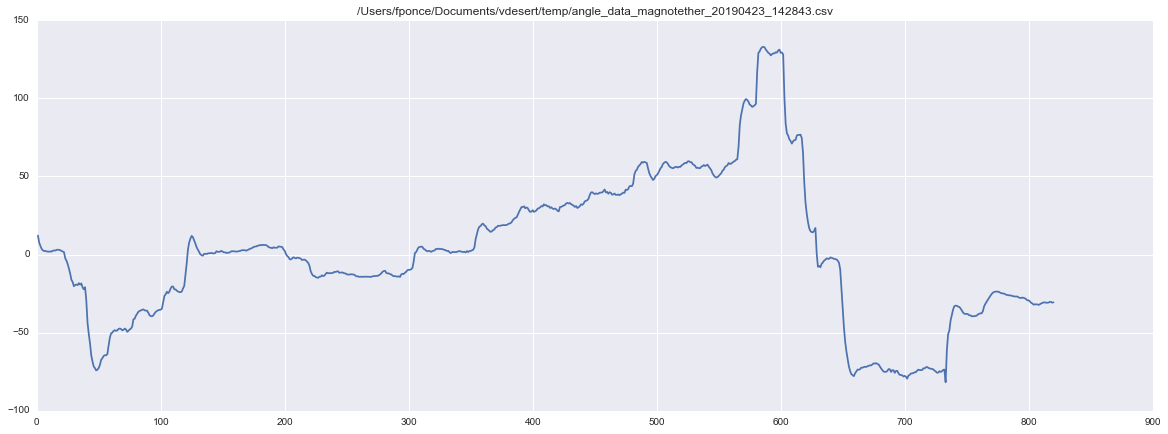

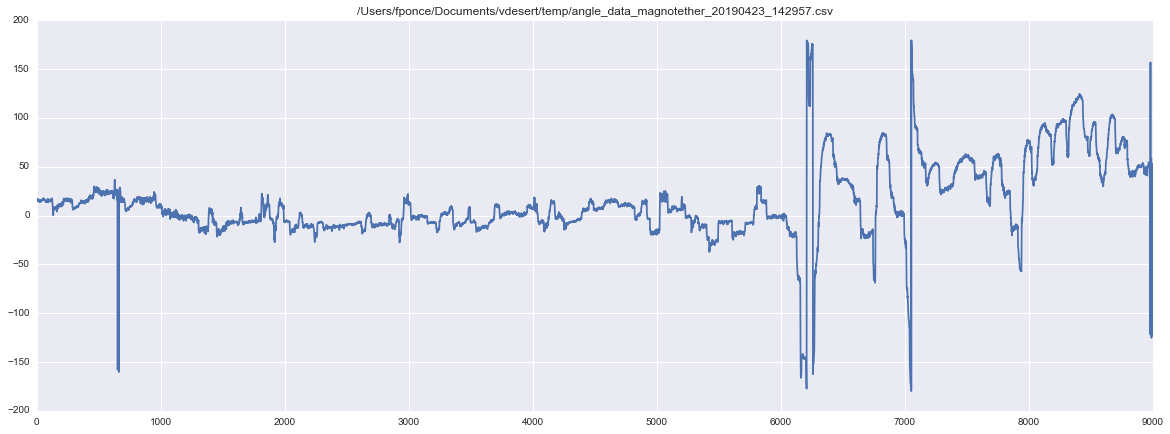

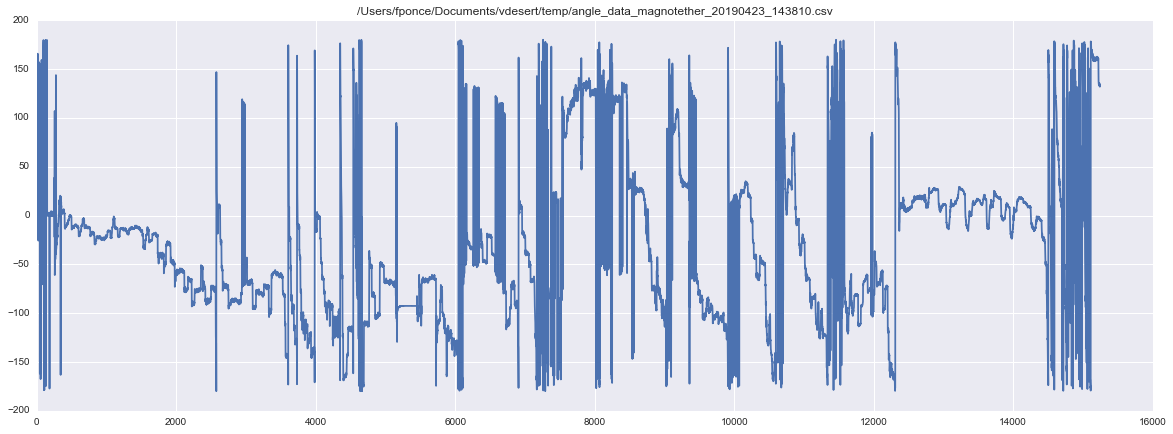

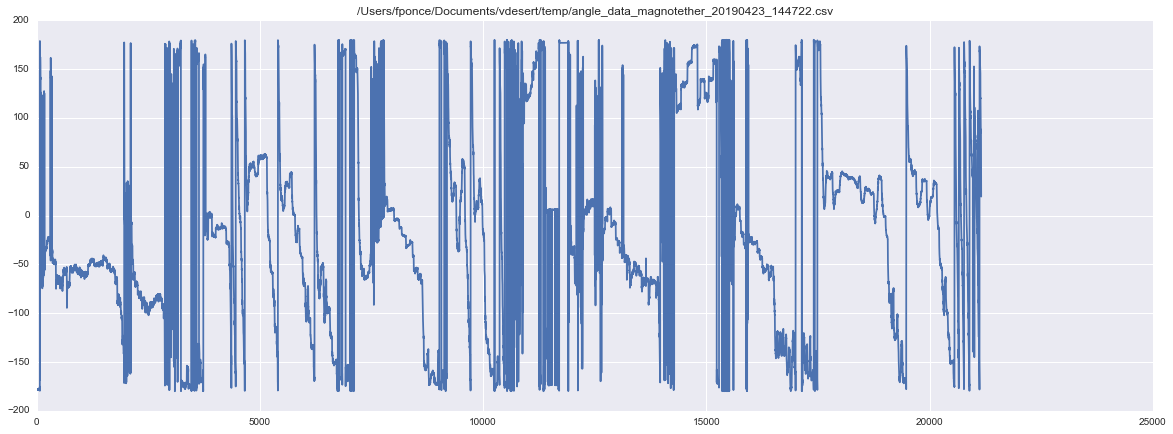

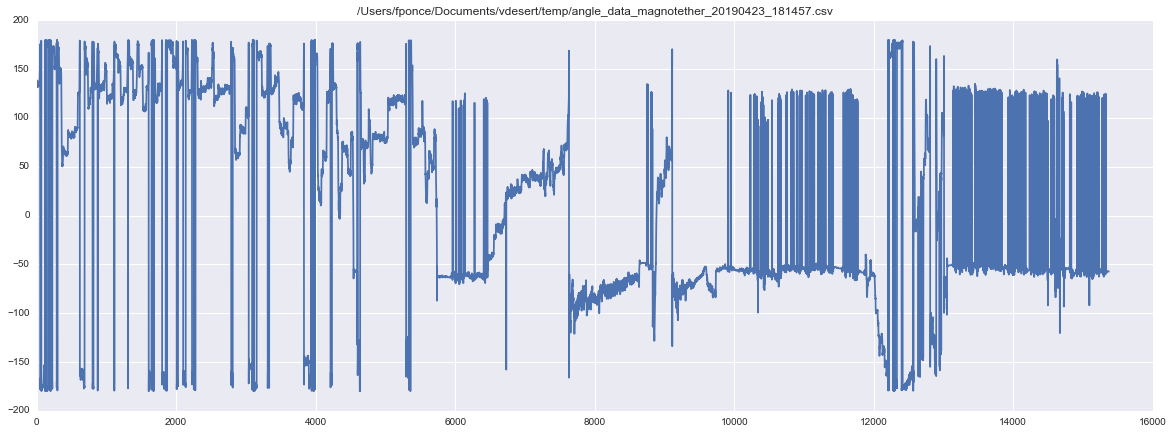

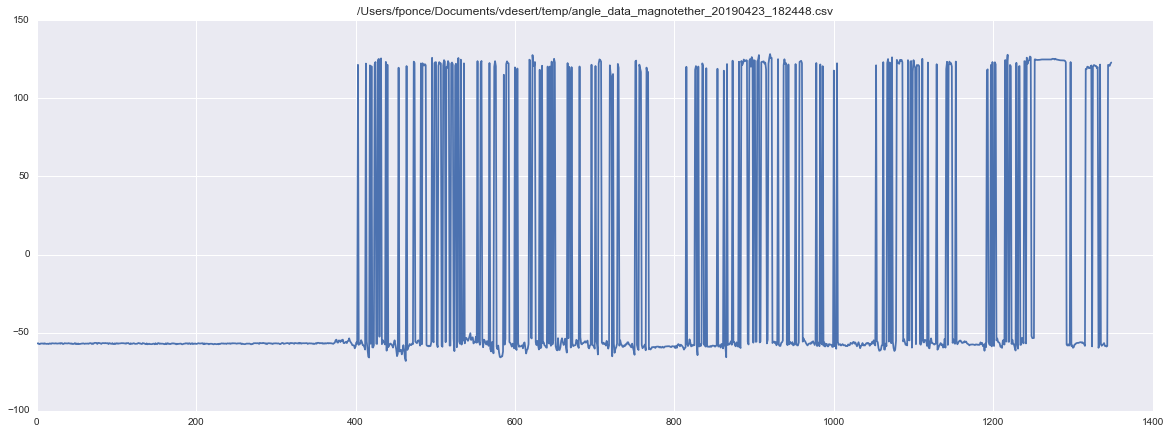

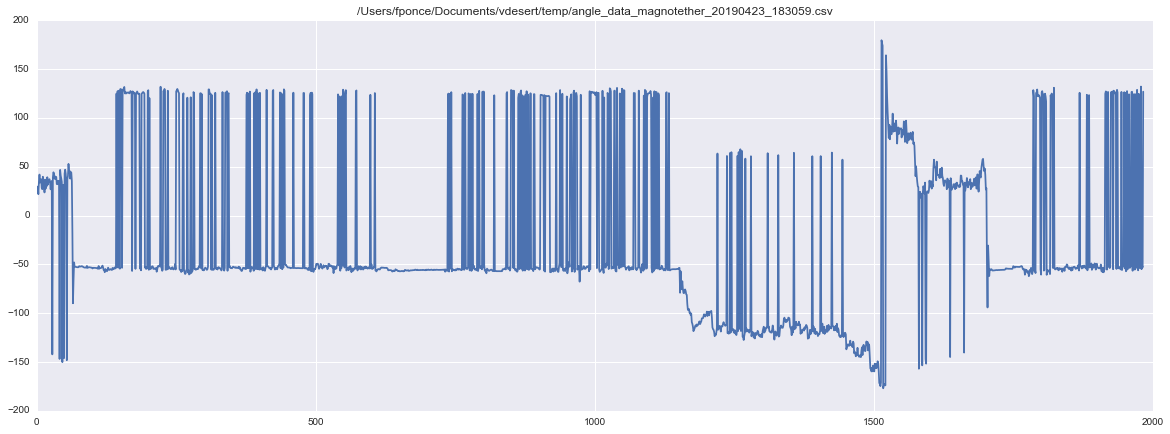

In [11]:
for i in range(len(allframes)):
#     print(len(allframes[i]))
    plt.figure(figsize=(20, 7))
    plt.plot(allframes[i], allangles[i])
#     print(len(allframes[i]))
#     plt.xlim(0,1800)
    plt.title(datapaths[i])

In [8]:
# sns.set()
# sns.set_style('white')

# fig, ax1 = plt.subplots(1,1,figsize=(15, 7))

# for i in [6]:#range(len(all_sorted_start_frames)):
#     #ax1.axvspan(350, len(anglestp), color='darkseagreen')
#     framestp = allframes[i][0:8000]
#     anglestp = allangles[i][0:8000]
        
#     #plt.yticks([ts_all_broken_keys[i][j]], fontsize = 30)
#     plt.xticks([])
#     plt.yticks([])
#     x1 = [0, 4000, 7999]
#     squad = ['0','130', '250']
        
#     y1 = [-180, 0, +180]
#     squadd = ['-180', '0', '-180']
#     ax1.set_yticks(y1)
#     ax1.set_xticks(x1)
#     ax1.set_xticklabels(squad, minor=False, rotation=0, fontsize = 36)
#     ax1.set_yticklabels(squadd, minor=False, rotation=0, fontsize = 36)
#     ax1.set_xlabel('Time (secs)', fontsize = 36, fontweight = 'bold')
#     ax1.set_ylabel('Angles (deg)', fontsize = 36, fontweight = 'bold')

        
#     ax1.axvspan(300, 7999, alpha=0.15, color='royalblue')
# #     ax1.axvspan(0, 350, alpha=0.02, color='white')
#         #ax1.set_title(str(ts_all_broken_keys[i][j])+' deg',fontsize = 16, fontweight = 'bold' )
#     ax1.tick_params(direction='out', length=15, width=2)
#     ax1.spines['left'].set_position(('outward',20))
#         # ax5.spines['left'].set_smart_bounds(True)
#         # ax5.spines['bottom'].set_smart_bounds(True)
#     ax1.spines['left'].set_linewidth(2)
#     ax1.spines['bottom'].set_linewidth(2)
        
#     plt.plot(anglestp, color = 'k', linewidth= 3)
        
#     plt.ylim(-200, 200)
# #     plt.yticks(np.arange(-180, 225,45), fontsize = 16)
#     sns.despine(top=True, right=True, left=False, bottom=False,)
#     ax1.set_yticklabels(squadd, minor=False, rotation=0, fontsize = 36)
#     ax1.plot((4001, 7999), (0,0), 'royalblue',  linewidth= 2, zorder = 200)
#     ax1.plot((300, 4000), (90,90), 'royalblue',  linewidth= 2, zorder = 200)